# EDA 

In [64]:
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from scipy.stats import zscore, ks_2samp
from sklearn.impute import KNNImputer
import missingno as msno

In [2]:
df = pd.read_csv(r"C:\Users\matar.aviv\Desktop\python\Data Science Bar Ilan\Project\r.csv")
df

userId  age         name  \
0                              4e3842f79b70e7ea57000064   25        daeni   
1                              4e3d34bf5d2bce7b160006a3   22  italiana 92   
2                              4eef8b81ebf2c8f64000000c   20   Qqkwmdowlo   
3                              4ef9434cca61bece6a000002   24     Baby dee   
4                              4f10cbc1883fa97a5f000015   24         Anna   
...                                                 ...  ...          ...   
4003                           55229e2fe66da132848b45a9   21        Jenny   
4004                           55229eb5e56da11a2c8b45a6   24         Lisa   
4005  CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRy...   24       Mon**a   
4006  CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4m...   21          M*l   
4007  CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te...   20        Ma**e   

      counts_pictures  counts_profileVisits  counts_kisses  \
0                   4                  8279            239   
1                   5                   663             13   
2                   3                 22187           1015   
3                  18                  7339            180   
4                  13                 18672            492   
...               ...                   ...            ...   
4003                0                     0              0   
4004                0                     0              0   
4005                7                  6049            507   
4006                5                   378             26   
4007                8                  1014             43   

      flirtInterests_chat  flirtInterests_friends  flirtInterests_date  isVIP  \
0                       1                       1                    1      0   
1                       1                       1                    1      0   
2                       1                       1                    0      0   
3                       1                       0                    1      0   
4                       0                       1                    0      0   
...                   ...                     ...                  ...    ...   
4003                    0                       0                    0      0   
4004                    0                       0                    0      0   
4005                    0                       0                    0      0   
4006                    1                       0                    0      0   
4007                    1                       1                    1      0   

      ...  crypt_y isSystemProfile_y  genderLooking  counts_fans  counts_g  \
0     ...      NaN               NaN              M          0.0       3.0   
1     ...      NaN               NaN              M          0.0       0.0   
2     ...      NaN               NaN           none          2.0       3.0   
3     ...      NaN               NaN              M          0.0       2.0   
4     ...      NaN               NaN           none          0.0       1.0   
...   ...      ...               ...            ...          ...       ...   
4003  ...      NaN               NaN              M          0.0       0.0   
4004  ...      NaN               NaN              M          0.0       0.0   
4005  ...      1.0               NaN              M          0.0       0.0   
4006  ...      1.0               NaN              M          0.0       0.0   
4007  ...      1.0               NaN              M          3.0       0.0   

      country  isInfluencer  isNew  shareProfileEnabled  \
0          CH           0.0    0.0                  1.0   
1          CH           0.0    0.0                  1.0   
2          CA           0.0    0.0                  1.0   
3          DE           0.0    0.0                  1.0   
4          DE           0.0    0.0                  1.0   
...       ...           ...    ...                  ...   
4003       DE           0.0    1.0                  1.0 

In [3]:
df.shape

(4008, 48)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   userId                  4008 non-null   object 
 1   age                     4008 non-null   int64  
 2   name                    4008 non-null   object 
 3   counts_pictures         4008 non-null   int64  
 4   counts_profileVisits    4008 non-null   int64  
 5   counts_kisses           4008 non-null   int64  
 6   flirtInterests_chat     4008 non-null   int64  
 7   flirtInterests_friends  4008 non-null   int64  
 8   flirtInterests_date     4008 non-null   int64  
 9   isVIP                   4008 non-null   int64  
 10  isVerified              4008 non-null   int64  
 11  lastOnline              4007 non-null   object 
 12  lastOnlineTs            4007 non-null   float64
 13  lang_count              4008 non-null   int64  
 14  lang_fr                 4008 non-null   

# Data Protocol

In [5]:
df['isfreshman'] = df['freshman'].fillna(df['isNew'])
df['crypt'] = df['crypt_x'].fillna(df['crypt_y'])
df['isSystemProfile'] = df['isSystemProfile_x'].fillna(df['isSystemProfile_y'])
df = df.drop(columns=['freshman','isNew','highlighted','crypt_x','crypt_y','isSystemProfile_x','isSystemProfile_y'])

In [7]:
cols = df.columns.tolist()
cols

['userId',
 'age',
 'name',
 'counts_pictures',
 'counts_profileVisits',
 'counts_kisses',
 'flirtInterests_chat',
 'flirtInterests_friends',
 'flirtInterests_date',
 'isVIP',
 'isVerified',
 'lastOnline',
 'lastOnlineTs',
 'lang_count',
 'lang_fr',
 'lang_en',
 'lang_de',
 'lang_it',
 'lang_es',
 'lang_pt',
 'city',
 'locationCity',
 'countDetails',
 'flirtstar',
 'hasBirthday',
 'distance',
 'mobile',
 'online',
 'whazzup',
 'pictureId',
 'connectedToFacebook',
 'locationCitySub',
 'userInfo_visitDate',
 'locked',
 'genderLooking',
 'counts_fans',
 'counts_g',
 'country',
 'isInfluencer',
 'shareProfileEnabled',
 'freetext',
 'isfreshman',
 'crypt',
 'isSystemProfile']

In [8]:
df['lastOnline'] = pd.to_datetime(df['lastOnline'])
df['name']=df['name'].astype(str)
df['city']=df['city'].astype(str)
df['locationCity']=df['locationCity'].astype(str)
df['userInfo_visitDate']=df['userInfo_visitDate'].astype(str)
df['whazzup']=df['whazzup'].astype(str)
df['pictureId']=df['pictureId'].astype(str)
df['locationCitySub']=df['locationCitySub'].astype(str)
df['genderLooking']=df['genderLooking'].astype(str)
df['country']=df['country'].astype(str)
df['freetext']=df['freetext'].astype(str)

In [15]:
df['connectedToFacebook']=df['connectedToFacebook'].fillna(-1)
df['isInfluencer']=df['isInfluencer'].fillna(-1)

In [9]:
# Type of valaues 
df.dtypes.to_csv("datatype.csv")
# Maximum valaues 
df.max().to_csv("max.csv")
# Minimum Values
df.min().to_csv("min.csv")
# Missing Values
df.isnull().sum(axis=0).to_csv("NA.csv")
# exporting results to the protocol
df.nunique().to_csv("unique.csv")
df.to_csv("flatfile.csv")

# Descriptive Statistics

Automated reports

### AutoViz

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (4008, 49)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  22
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  6
    Number o

Number of All Scatter Plots = 15


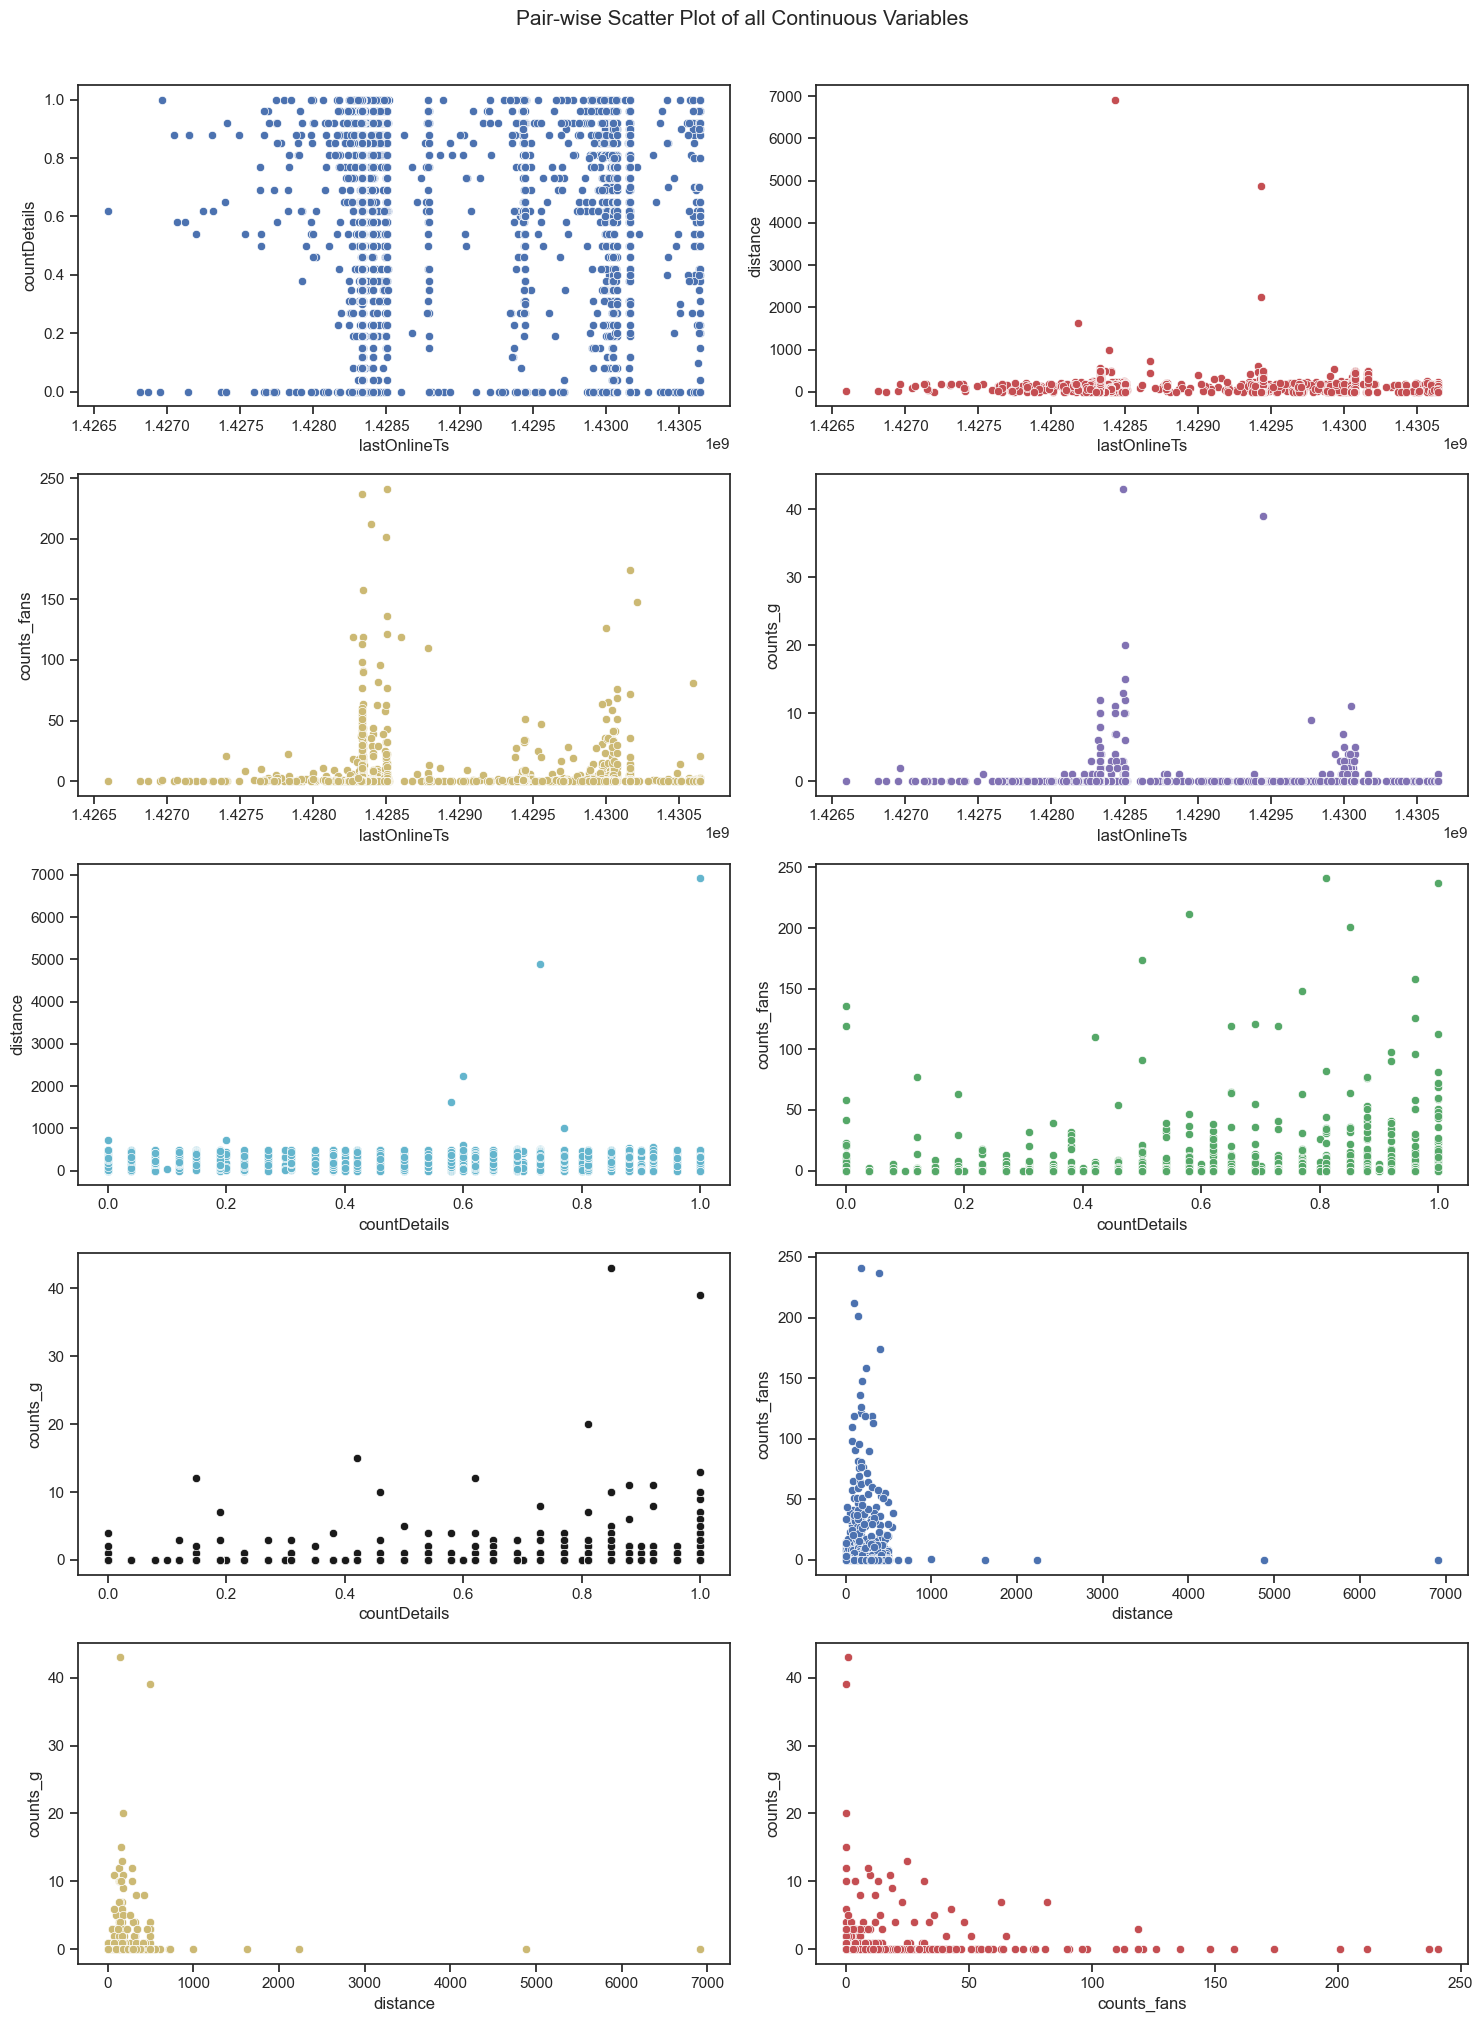

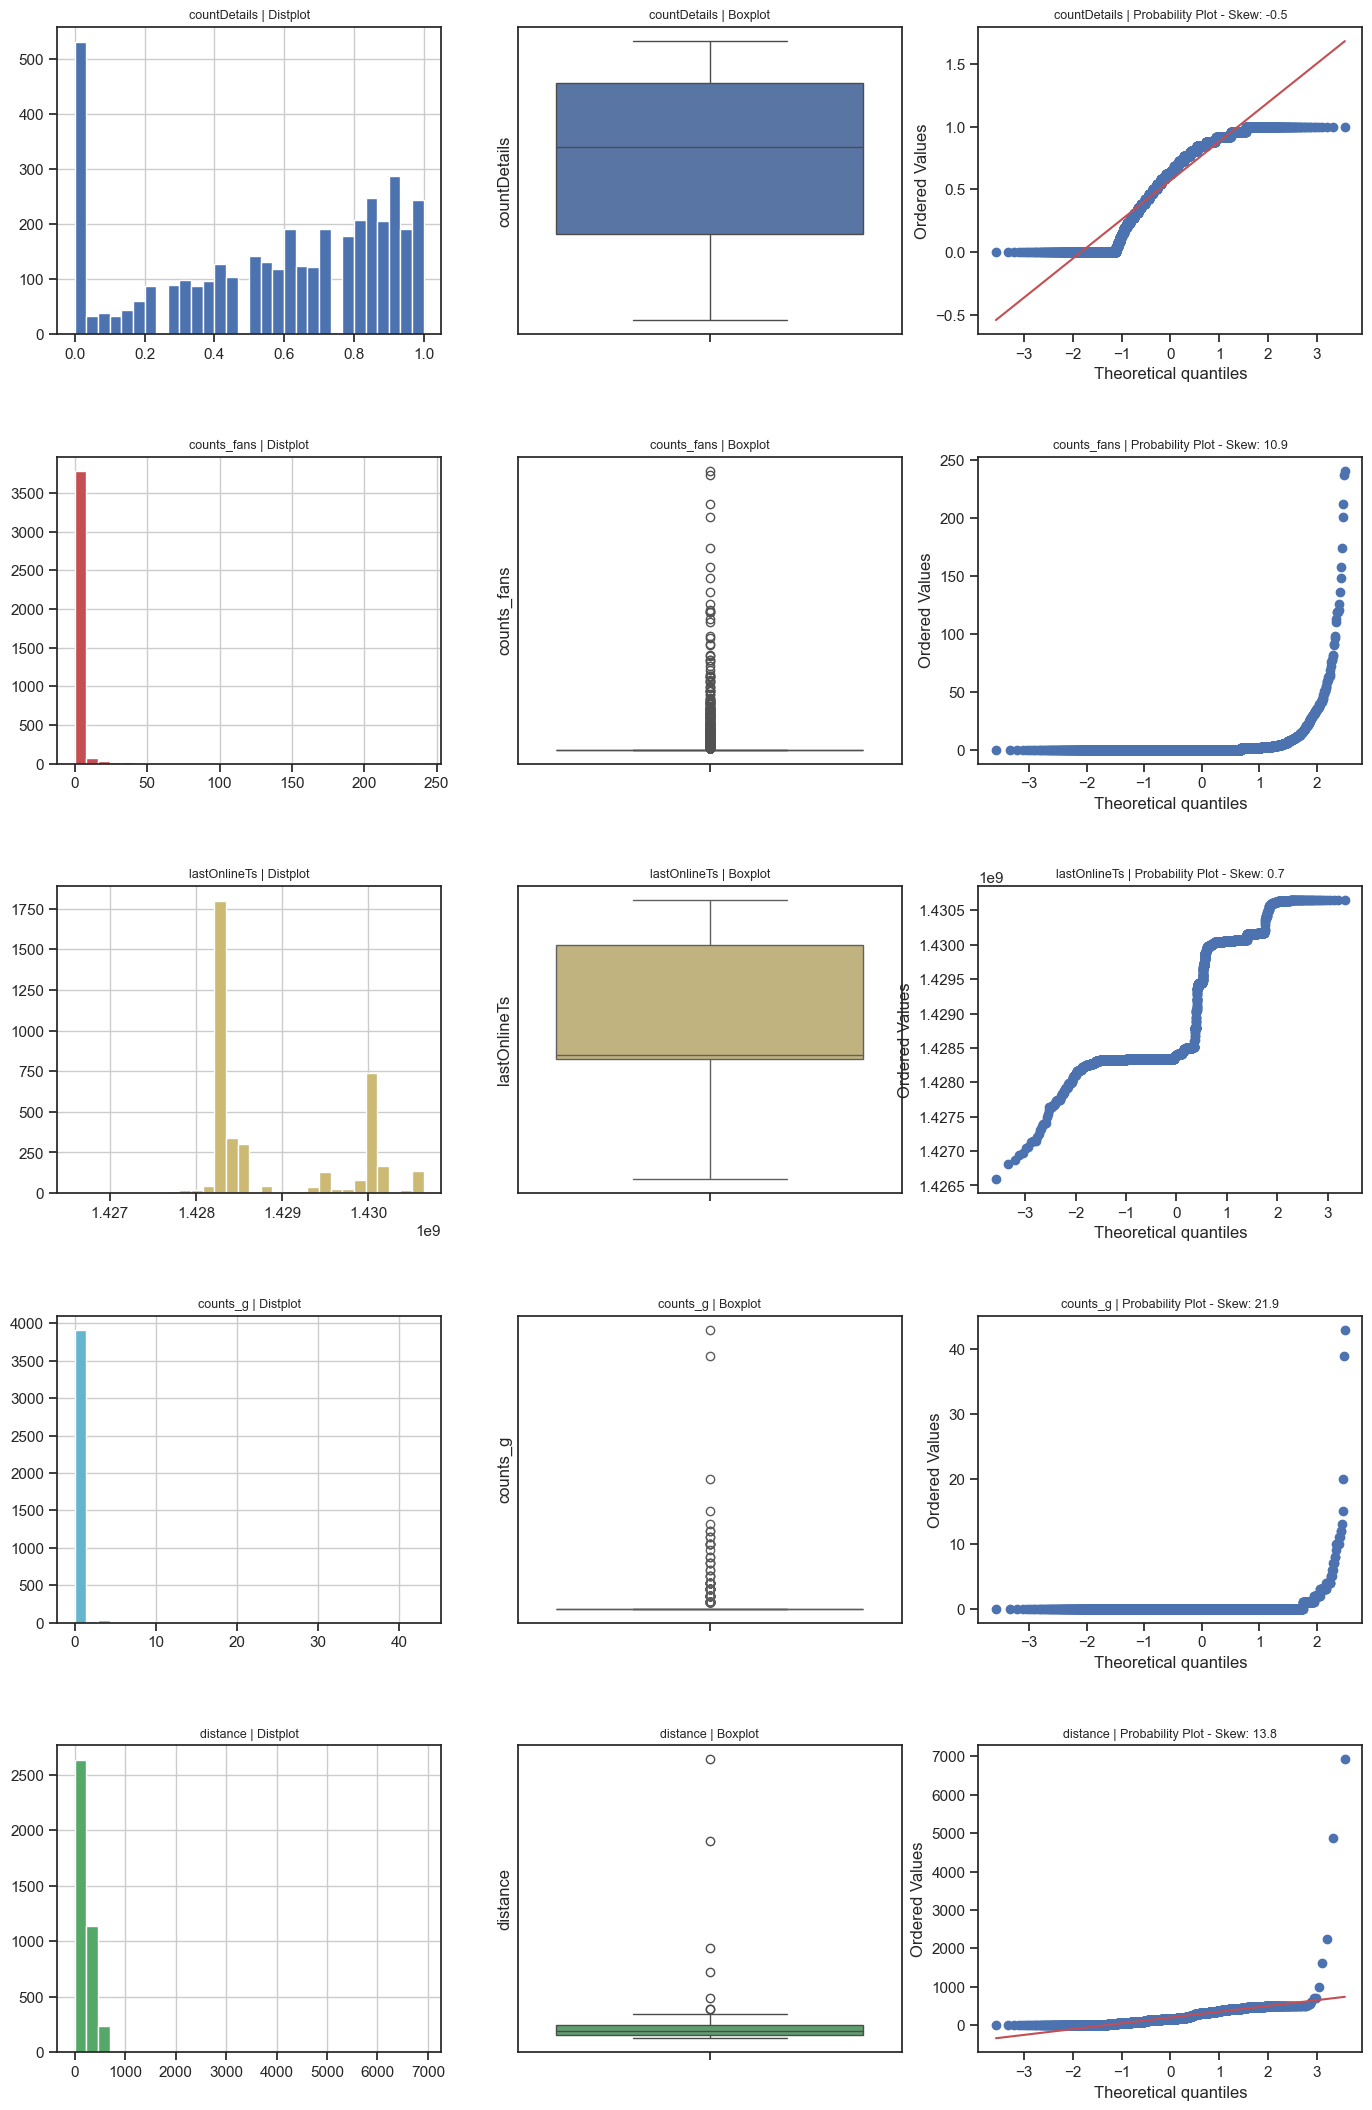

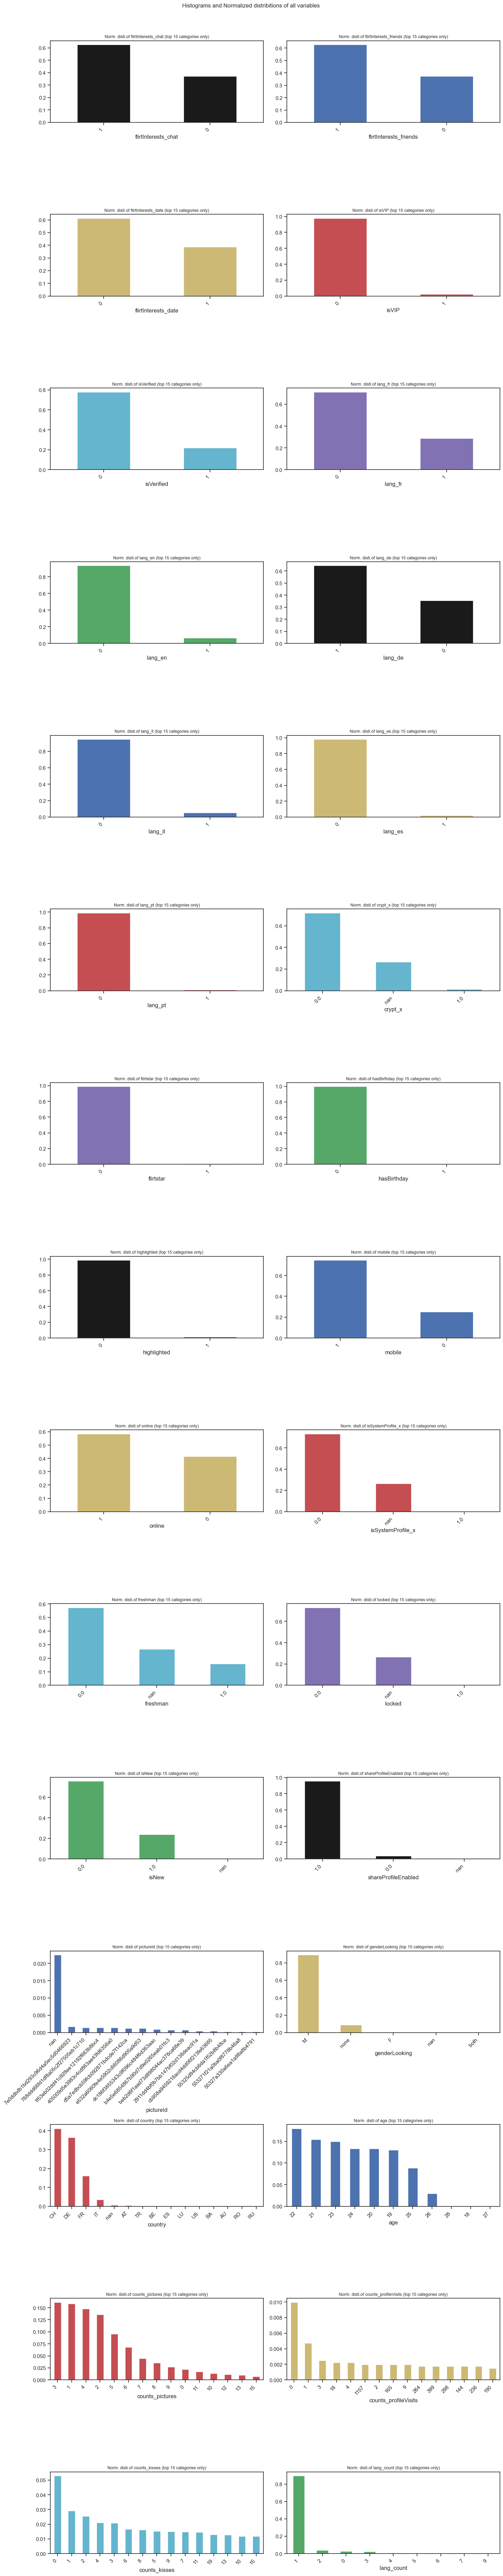

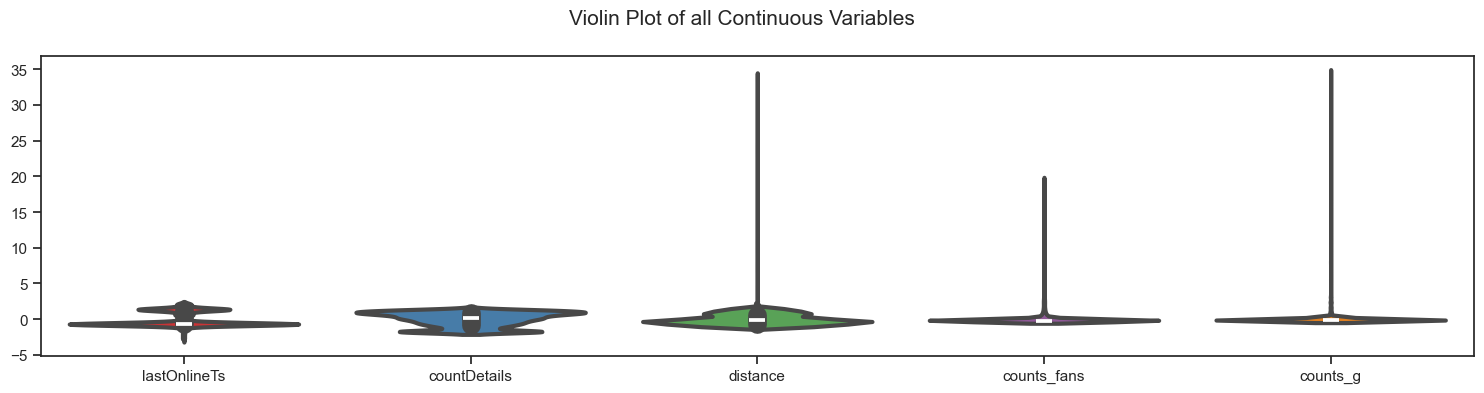

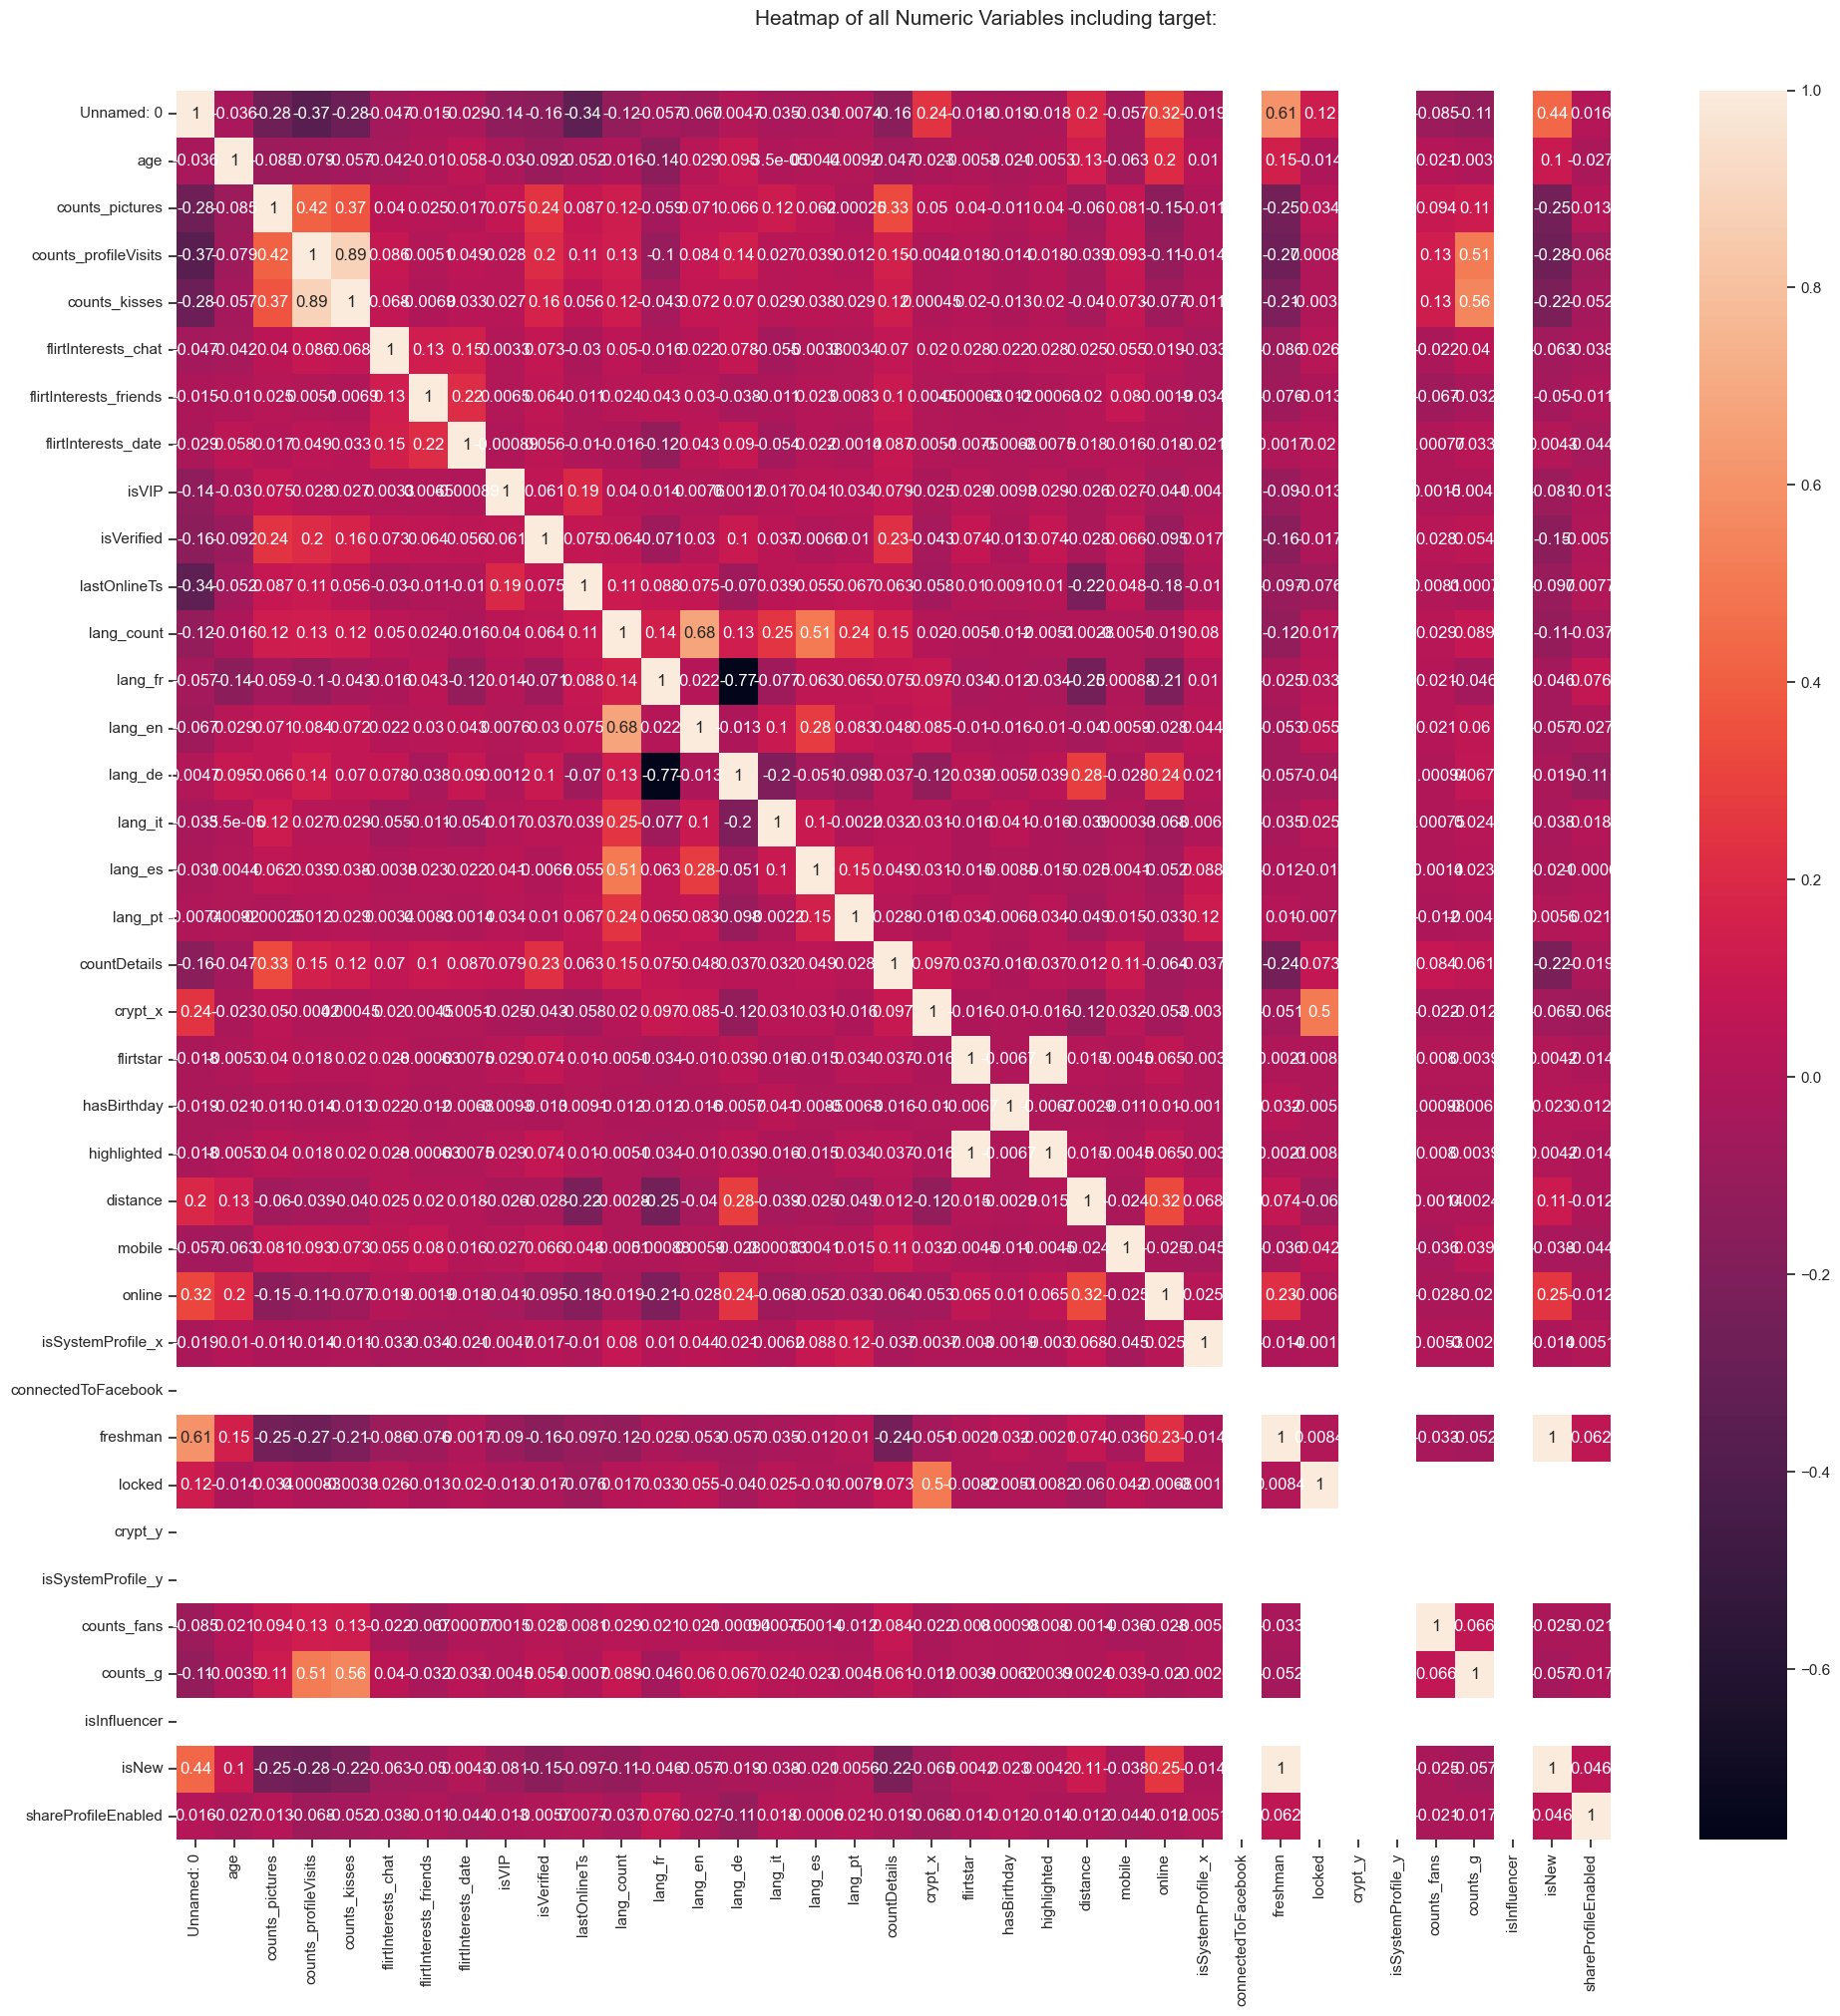

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\matar.aviv\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\matar.aviv\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\matar.aviv\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\matar.aviv\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\matar.aviv\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users

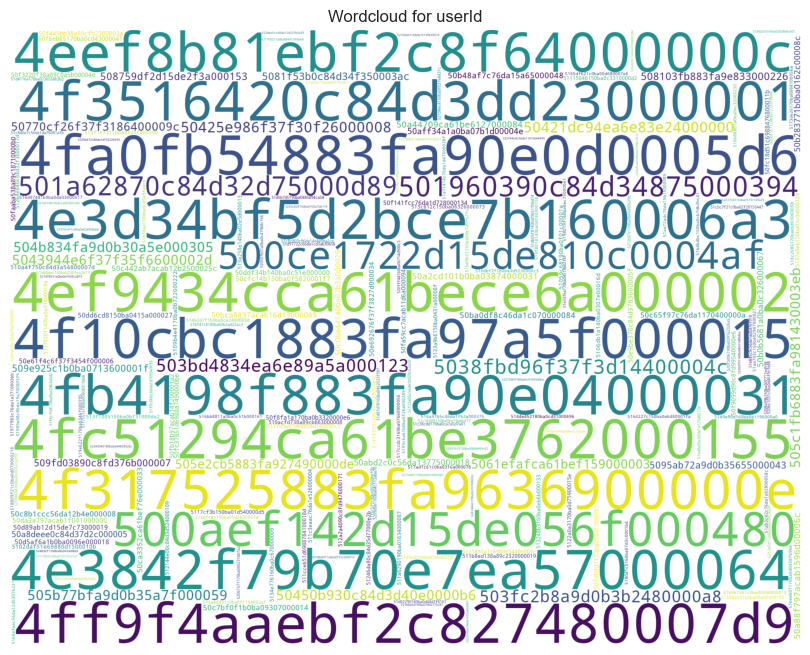

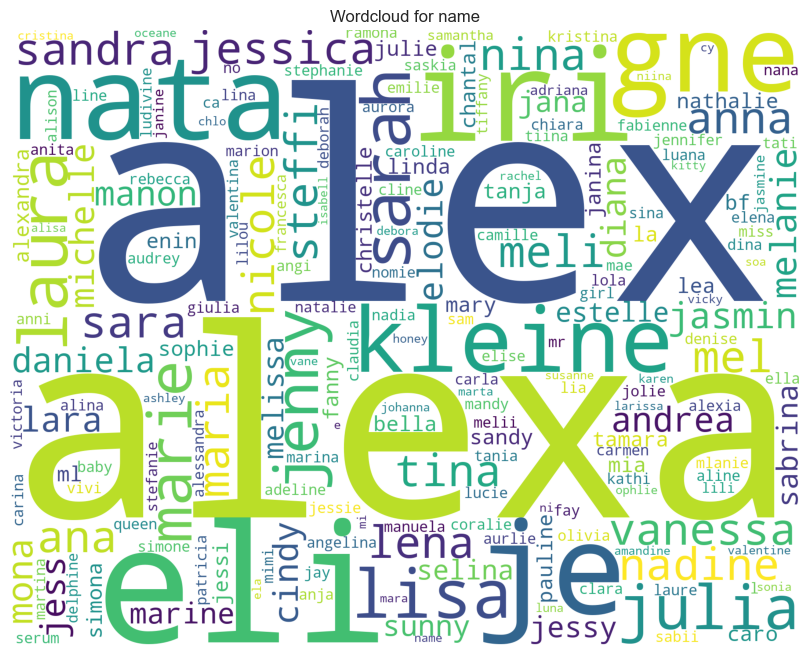

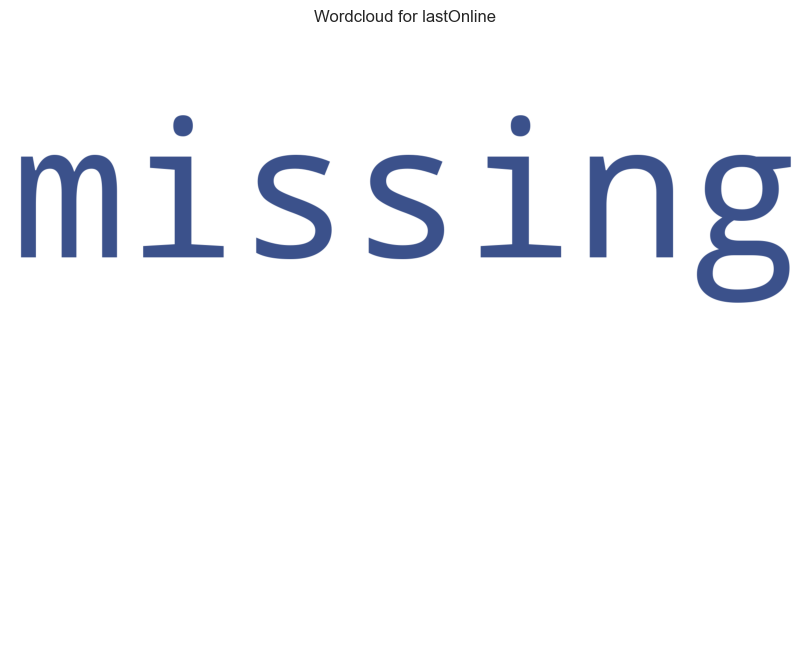

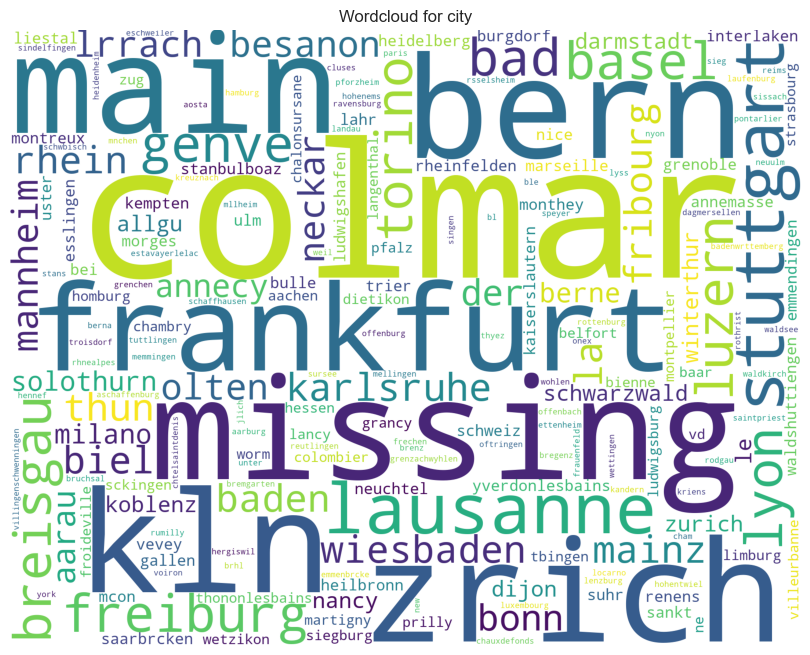

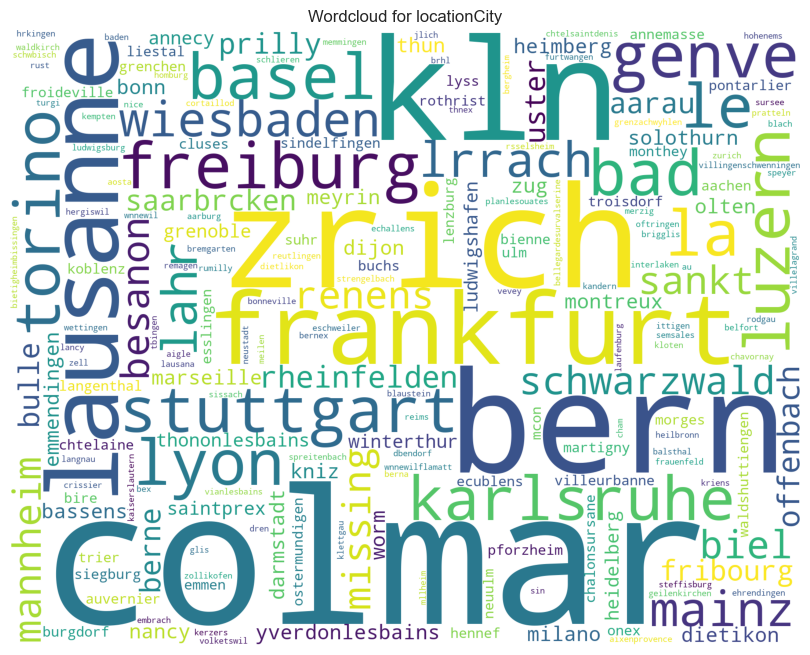

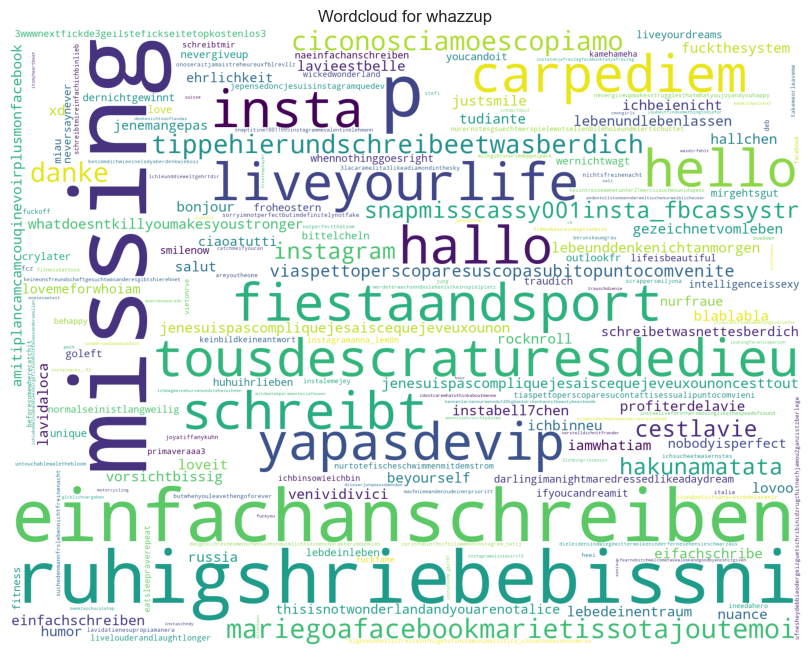

All Plots done
Time to run AutoViz = 135 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Unnamed: 0                            userId                             \
0           0                                        4e3842f79b70e7ea57000064   
1           1                                        4e3d34bf5d2bce7b160006a3   
2           2                                        4eef8b81ebf2c8f64000000c   
3           3                                        4ef9434cca61bece6a000002   
4           4                                        4f10cbc1883fa97a5f000015   
...          ...                                                          ...   
4003     4003                                        55229e2fe66da132848b45a9   
4004     4004                                        55229eb5e56da11a2c8b45a6   
4005     4005     CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRyXiugVQ4sVCQ==   
4006     4006     CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4mbQ3s95pSAig==   
4007     4007     CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==   

      age     name      counts_pictures  counts_profileVisits  counts_kisses  \
0     25         daeni         4                  8279              239        
1     22   italiana 92         5                   663               13        
2     20    Qqkwmdowlo         3                 22187             1015        
3     24      Baby dee        18                  7339              180        
4     24          Anna        13                 18672              492        
...   ...          ...              ...                   ...            ...   
4003  21         Jenny         0                     0                0        
4004  24          Lisa         0                     0                0        
4005  24        Mon**a         7                  6049              507        
4006  21           M*l         5                   378               26        
4007  20         Ma**e         8                  1014               43        

      flirtInterests_chat  flirtInterests_friends  flirtInterests_date  isVIP  \
0              1                      1                     1             0     
1              1                      1                     1             0     
2              1                      1                     0             0     
3              1                      0                     1             0     
4              0                      1                     0             0     
...                   ...                     ...                  ...    ...   
4003           0                      0                     0             0     
4004           0                      0                     0             0     
4005           0                      0                     0             0     
4006           1                      0                     0             0     
4007           1                      1                     1             0     

      isVerified         lastOnline          lastOnlineTs  lang_count  \
0          0      2015-04-25 20:43:26+00:00  1.429995e+09       1       
1          0      2015-04-26 09:19:35+00:00  1.430040e+09       3       
2          0      2015-04-07 11:21:01+00:00  1.428406e+09       2       
3          0      2015-04-08 14:37:51+00:00  1.428504e+09       2       
4          0      2015-04-27 19:29:58+00:00  1.430163e+09       5       
...          ...                        ...           ...         ...   
4003       0      2015-04-06 14:59:50+00:00  1.428332e+09       1       
4004       0      2015-04-06 14:56:56+00:00  1.428332e+09       1       
4005       1      2015-04-06 11:56:57+00:00  1.428321e+09       1       
4006       0      2015-04-06 12:55:45+00:00  1.428325e+09       1       
4007       0      2015-04-06 07:54:34+00:00  1.428307e+09       1       

      lang_fr  lang_en  lang_de  lang_it  lang_es  lang_pt        city        \
0        0        0        1        0        0        0           Rothenburg   
1        1        0        1        1        0        0       

In [39]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()
AV.AutoViz(r'C:\Users\matar.aviv\Desktop\python\Data Science Bar Ilan\Project\flatfile.csv')

# EDA - Explenatory Data Analysis

In [10]:
df.describe()

age  counts_pictures  counts_profileVisits  counts_kisses  \
count  4008.000000      4008.000000           4008.000000    4008.000000   
mean     21.990768         4.796407           3707.971307     156.609531   
std       1.957539         4.416993           6837.120627     377.041518   
min      18.000000         0.000000              0.000000       0.000000   
25%      20.000000         2.000000            384.000000      11.000000   
50%      22.000000         4.000000           1222.000000      44.000000   
75%      24.000000         6.000000           4083.000000     141.000000   
max      28.000000        30.000000         164425.000000    9288.000000   

       flirtInterests_chat  flirtInterests_friends  flirtInterests_date  \
count          4008.000000             4008.000000          4008.000000   
mean              0.626747                0.627745             0.387475   
std               0.483729                0.483466             0.487234   
min               0.000000                0.000000             0.000000   
25%               0.000000                0.000000             0.000000   
50%               1.000000                1.000000             0.000000   
75%               1.000000                1.000000             1.000000   
max               1.000000                1.000000             1.000000   

             isVIP  isVerified  lastOnlineTs  ...       online  \
count  4008.000000  4008.00000  4.007000e+03  ...  4008.000000   
mean      0.022705     0.21981  1.428923e+09  ...     0.584581   
std       0.148979     0.41417  8.250713e+05  ...     0.492856   
min       0.000000     0.00000  1.426592e+09  ...     0.000000   
25%       0.000000     0.00000  1.428332e+09  ...     0.000000   
50%       0.000000     0.00000  1.428400e+09  ...     1.000000   
75%       0.000000     0.00000  1.429992e+09  ...     1.000000   
max       1.000000     1.00000  1.430647e+09  ...     1.000000   

       connectedToFacebook       locked  counts_fans     counts_g  \
count               2940.0  2940.000000  3983.000000  3983.000000   
mean                   0.0     0.005102     2.337685     0.125534   
std                    0.0     0.071258    12.249138     1.240254   
min                    0.0     0.000000     0.000000     0.000000   
25%                    0.0     0.000000     0.000000     0.000000   
50%                    0.0     0.000000     0.000000     0.000000   
75%                    0.0     0.000000     0.000000     0.000000   
max                    0.0     1.000000   241.000000    43.000000   

       isInfluencer  shareProfileEnabled   isfreshman        crypt  \
count        3983.0          3983.000000  4008.000000  2943.000000   
mean            0.0             0.960834     0.238273     0.020727   
std             0.0             0.194015     0.426080     0.142494   
min             0.0             0.000000     0.000000     0.000000   
25%             0.0             1.000000     0.000000     0.000000   
50%             0.0             1.000000     0.000000     0.000000   
75%             0.0             1.000000     0.000000     0.000000   
max             0.0             1.000000     1.000000     1.000000   

       isSystemProfile  
count      2940.000000  
mean          0.000680  
std           0.026078  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max           1.000000  

[8 rows x 32 columns]

# Categorial Data 

In [11]:
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   userId                  4008 non-null   category           
 1   age                     4008 non-null   int64              
 2   name                    4008 non-null   category           
 3   counts_pictures         4008 non-null   int64              
 4   counts_profileVisits    4008 non-null   int64              
 5   counts_kisses           4008 non-null   int64              
 6   flirtInterests_chat     4008 non-null   int64              
 7   flirtInterests_friends  4008 non-null   int64              
 8   flirtInterests_date     4008 non-null   int64              
 9   isVIP                   4008 non-null   int64              
 10  isVerified              4008 non-null   int64              
 11  lastOnline              4007 non-null   dat

In [16]:
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()
categorical_cols

['userId',
 'name',
 'city',
 'locationCity',
 'whazzup',
 'pictureId',
 'locationCitySub',
 'userInfo_visitDate',
 'genderLooking',
 'country',
 'freetext']

In [21]:
# Filter out the categorical columns
categorical_df = df[categorical_cols]
categorical_df_s = categorical_df.drop(columns=['whazzup','freetext'])
categorical_df_s.columns

Index(['userId', 'name', 'city', 'locationCity', 'pictureId',
       'locationCitySub', 'userInfo_visitDate', 'genderLooking', 'country'],
      dtype='object')

In [22]:
plot_categorical = lambda col: sns.countplot(x=col, data=categorical_df_s)

In [ ]:
a = 1  # number of rows
#b = 2  # number of columns
c = 1  # plot counter

num_plots = len(categorical_df_s.columns)
b = num_plots  # number of columns


fig = plt.figure(figsize=(25,10))
plt.subplots_adjust(hspace = 0.5)
sb.set(font_scale = 2.5)
for i in categorical_df_s:

        plt.subplot(a, b, c)
        plt.title('{}'.format(i))
        plt.xlabel(i)
        sb.countplot(categorical_df_s[i])
        c = c + 1

plt.show()

# Histograms for continues numbers 

In [24]:
con_cols=df.select_dtypes(exclude=['category']).columns.tolist()
con_cols

['age',
 'counts_pictures',
 'counts_profileVisits',
 'counts_kisses',
 'flirtInterests_chat',
 'flirtInterests_friends',
 'flirtInterests_date',
 'isVIP',
 'isVerified',
 'lastOnline',
 'lastOnlineTs',
 'lang_count',
 'lang_fr',
 'lang_en',
 'lang_de',
 'lang_it',
 'lang_es',
 'lang_pt',
 'countDetails',
 'flirtstar',
 'hasBirthday',
 'distance',
 'mobile',
 'online',
 'connectedToFacebook',
 'locked',
 'counts_fans',
 'counts_g',
 'isInfluencer',
 'shareProfileEnabled',
 'isfreshman',
 'crypt',
 'isSystemProfile']

In [26]:
con_df = df[con_cols]

In [27]:
num_col_list=[]
for col in con_cols:
    if con_df[col].nunique()>2:
        num_col_list.append(col)
num_col_list

['age',
 'counts_pictures',
 'counts_profileVisits',
 'counts_kisses',
 'lastOnline',
 'lastOnlineTs',
 'lang_count',
 'countDetails',
 'distance',
 'counts_fans',
 'counts_g']

In [29]:
num_col_df = df[num_col_list]
num_col_df.head()

age  counts_pictures  counts_profileVisits  counts_kisses  \
0   25                4                  8279            239   
1   22                5                   663             13   
2   20                3                 22187           1015   
3   24               18                  7339            180   
4   24               13                 18672            492   

                 lastOnline  lastOnlineTs  lang_count  countDetails  distance  \
0 2015-04-25 20:43:26+00:00  1.429995e+09           1          1.00     175.0   
1 2015-04-26 09:19:35+00:00  1.430040e+09           3          0.85     138.0   
2 2015-04-07 11:21:01+00:00  1.428406e+09           2          0.12      77.3   
3 2015-04-08 14:37:51+00:00  1.428504e+09           2          0.81     194.0   
4 2015-04-27 19:29:58+00:00  1.430163e+09           5          0.65     318.0   

   counts_fans  counts_g  
0          0.0       3.0  
1          0.0       0.0  
2          2.0       3.0  
3          0.0       2.0  
4          0.0       1.0

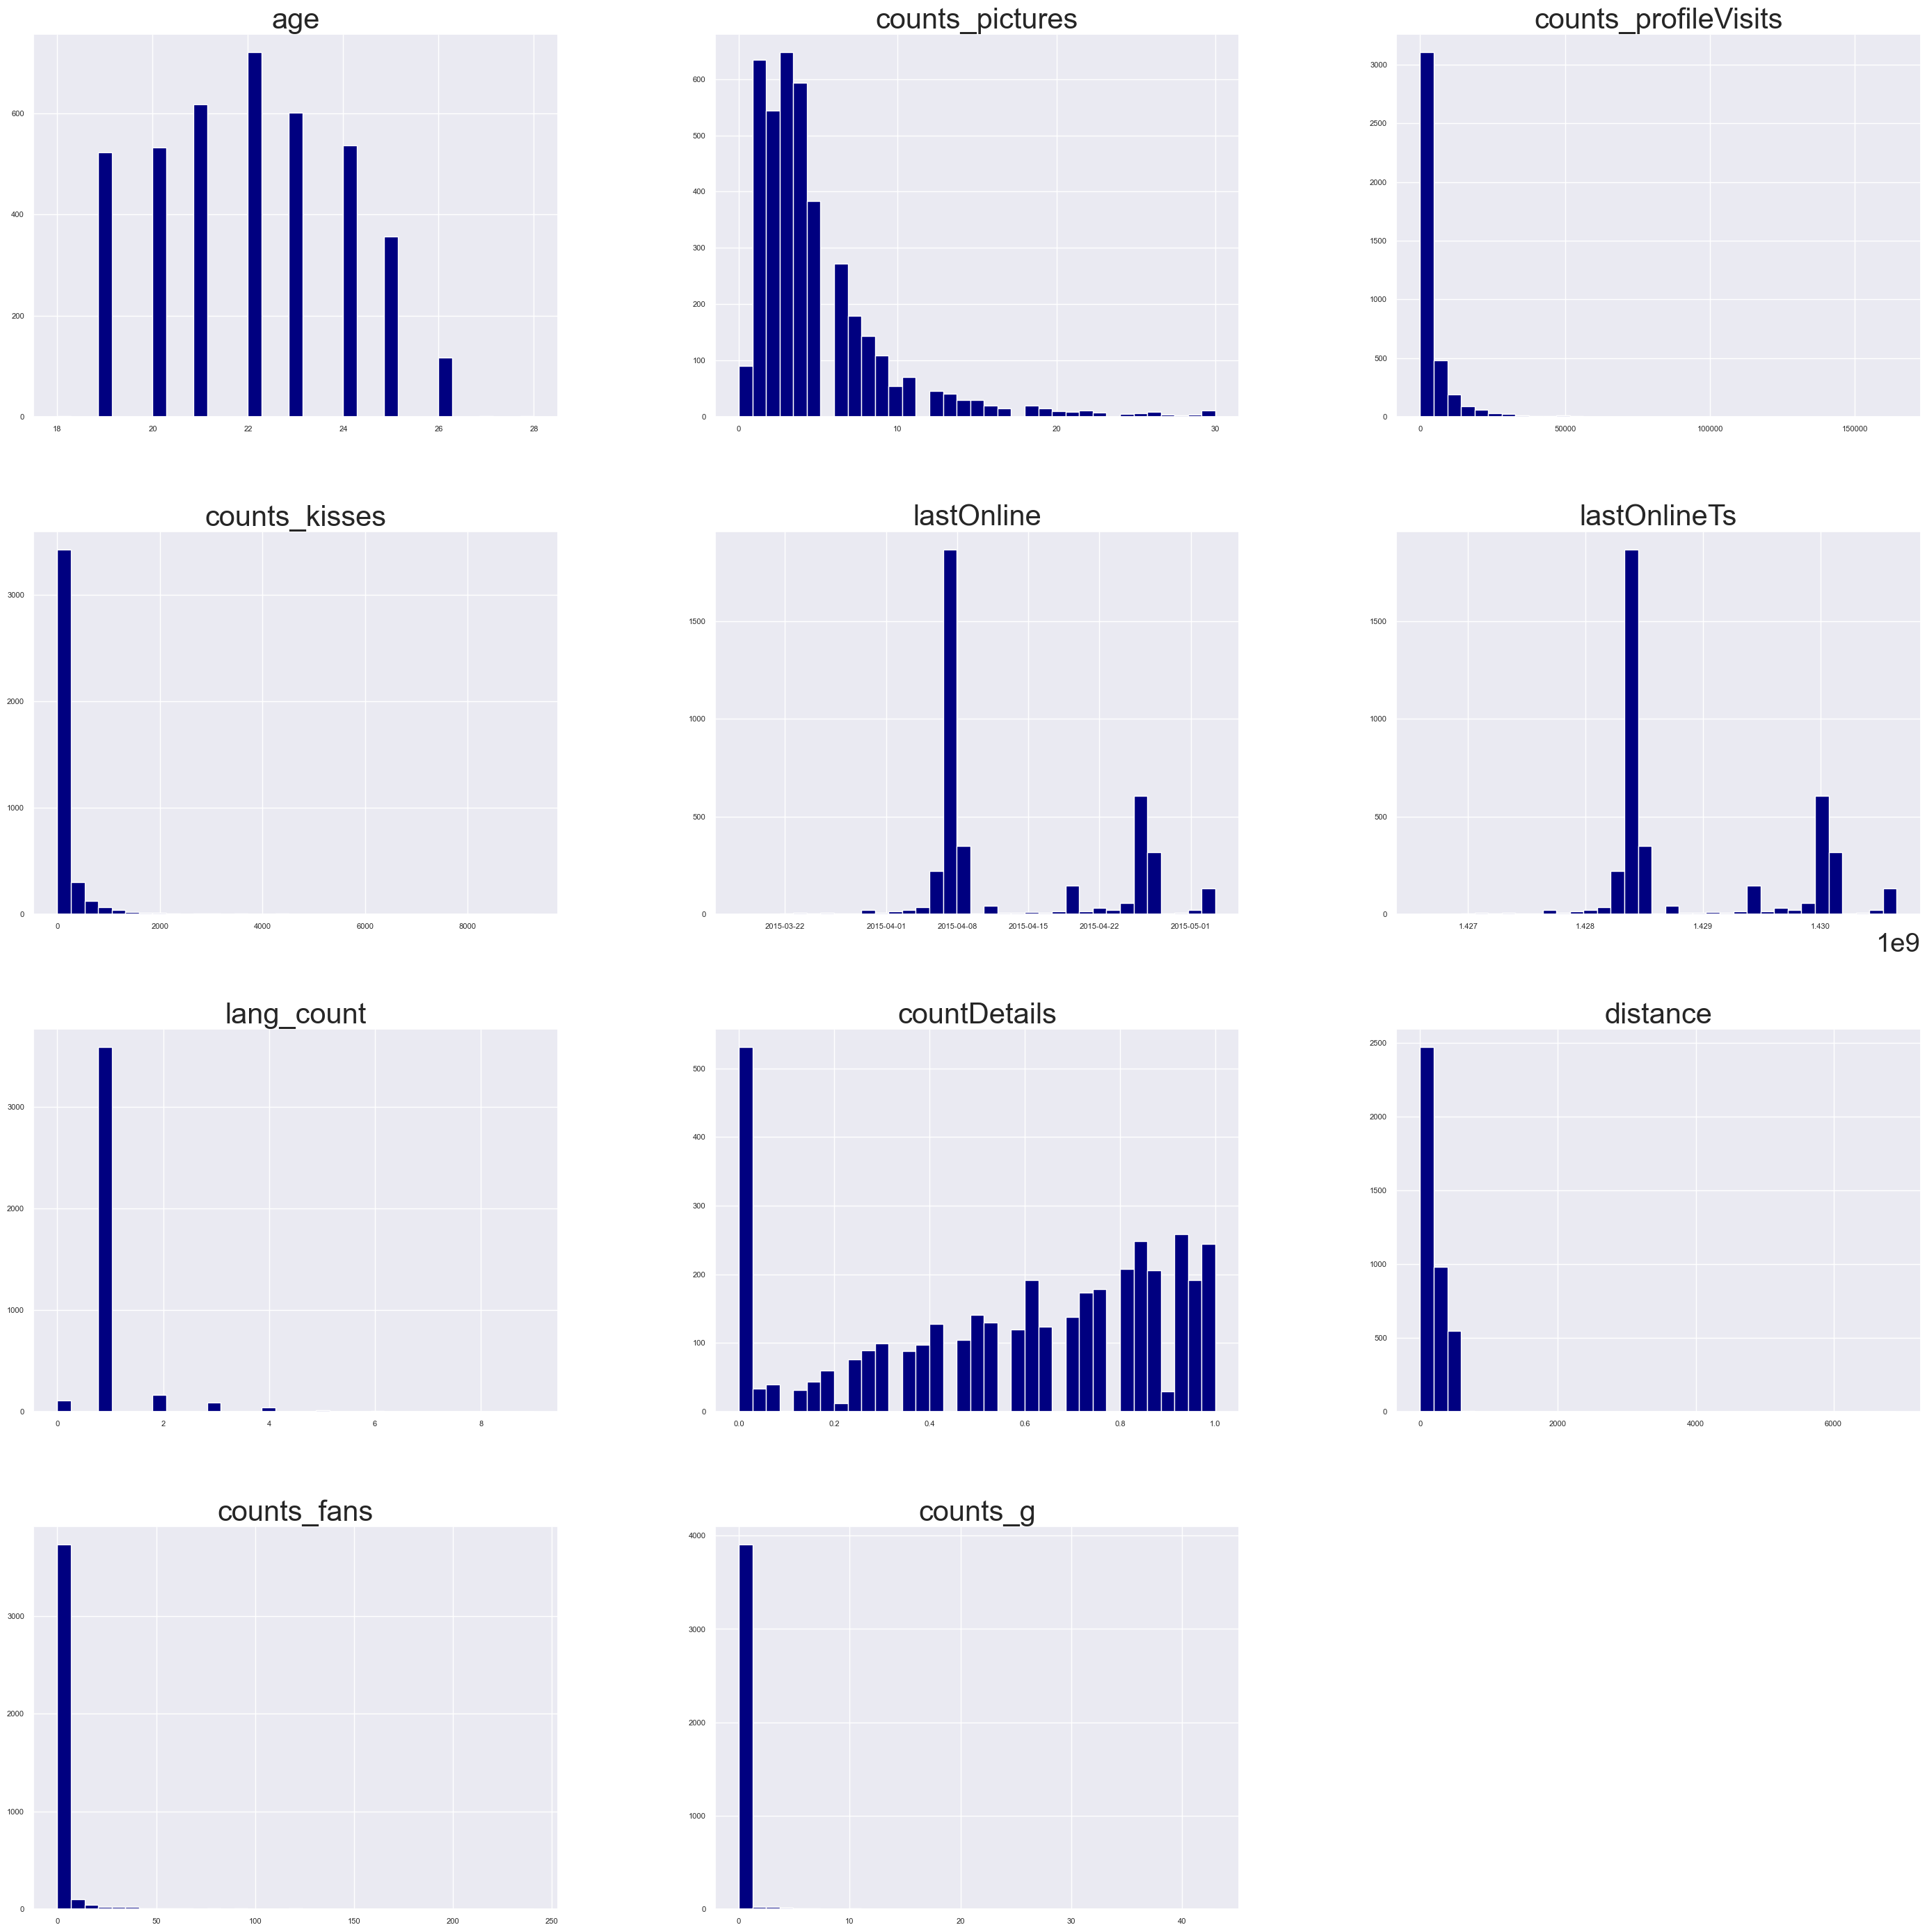

In [30]:
num_col_df.hist(figsize=(35, 35), bins=35, xlabelsize=8, ylabelsize=8, color = "navy");

In [32]:
cat_num_col = ['lang_count','counts_g']
for col in con_cols:
    if con_df[col].nunique()==2:
        cat_num_col.append(col)
cat_num_col

['lang_count',
 'counts_g',
 'flirtInterests_chat',
 'flirtInterests_friends',
 'flirtInterests_date',
 'isVIP',
 'isVerified',
 'lang_fr',
 'lang_en',
 'lang_de',
 'lang_it',
 'lang_es',
 'lang_pt',
 'flirtstar',
 'hasBirthday',
 'mobile',
 'online',
 'connectedToFacebook',
 'locked',
 'isInfluencer',
 'shareProfileEnabled',
 'isfreshman',
 'crypt',
 'isSystemProfile']

In [33]:
cat_num_df = df[cat_num_col]
cat_num_df.head()

lang_count  counts_g  flirtInterests_chat  flirtInterests_friends  \
0           1       3.0                    1                       1   
1           3       0.0                    1                       1   
2           2       3.0                    1                       1   
3           2       2.0                    1                       0   
4           5       1.0                    0                       1   

   flirtInterests_date  isVIP  isVerified  lang_fr  lang_en  lang_de  ...  \
0                    1      0           0        0        0        1  ...   
1                    1      0           0        1        0        1  ...   
2                    0      0           0        1        1        0  ...   
3                    1      0           0        0        1        1  ...   
4                    0      0           0        0        1        1  ...   

   hasBirthday  mobile  online  connectedToFacebook  locked  isInfluencer  \
0            0       1       0                  0.0     0.0           0.0   
1            0       1       0                  0.0     0.0           0.0   
2            0       0       0                  0.0     0.0           0.0   
3            0       1       1                  0.0     0.0           0.0   
4            0       1       1                  0.0     0.0           0.0   

   shareProfileEnabled  isfreshman  crypt  isSystemProfile  
0                  1.0         0.0    0.0              0.0  
1                  1.0         0.0    0.0              0.0  
2                  1.0         0.0    0.0              0.0  
3                  1.0         0.0    0.0              0.0  
4                  1.0         0.0    0.0              0.0  

[5 rows x 24 columns]

In [37]:
num_col_df = num_col_df.drop(columns=['lang_count','counts_g'])
num_col_df.head()

age  counts_pictures  counts_profileVisits  counts_kisses  \
0   25                4                  8279            239   
1   22                5                   663             13   
2   20                3                 22187           1015   
3   24               18                  7339            180   
4   24               13                 18672            492   

                 lastOnline  lastOnlineTs  countDetails  distance  counts_fans  
0 2015-04-25 20:43:26+00:00  1.429995e+09          1.00     175.0          0.0  
1 2015-04-26 09:19:35+00:00  1.430040e+09          0.85     138.0          0.0  
2 2015-04-07 11:21:01+00:00  1.428406e+09          0.12      77.3          2.0  
3 2015-04-08 14:37:51+00:00  1.428504e+09          0.81     194.0          0.0  
4 2015-04-27 19:29:58+00:00  1.430163e+09          0.65     318.0          0.0

# Skewness

In [38]:
num_col_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   age                   4008 non-null   int64              
 1   counts_pictures       4008 non-null   int64              
 2   counts_profileVisits  4008 non-null   int64              
 3   counts_kisses         4008 non-null   int64              
 4   lastOnline            4007 non-null   datetime64[ns, UTC]
 5   lastOnlineTs          4007 non-null   float64            
 6   countDetails          4008 non-null   float64            
 7   distance              4008 non-null   float64            
 8   counts_fans           3983 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4), int64(4)
memory usage: 281.9 KB


In [39]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default  
        
con_df_time = num_col_df.drop(columns='lastOnline')
pd.DataFrame(con_df_time.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

C:\Users\matar.aviv\AppData\Local\Temp\ipykernel_39808\374509637.py:13: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  pd.DataFrame(con_df_time.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)


Most continus data are normaly distributed

# Correlation

In [40]:
df.set_index('userId',inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   age                     4008 non-null   int64              
 1   name                    4008 non-null   category           
 2   counts_pictures         4008 non-null   int64              
 3   counts_profileVisits    4008 non-null   int64              
 4   counts_kisses           4008 non-null   int64              
 5   flirtInterests_chat     4008 non-null   int64              
 6   flirtInterests_friends  4008 non-null   int64              
 7   flirtInterests_date     4008 non-null   int64              
 8   isVIP                   4008 non-null   int64              
 9   isVerified              4008 non-null   int64              
 10  lastOnline              

In [47]:
num_col_df.corr()

age  counts_pictures  counts_profileVisits  \
age                   1.000000        -0.085162             -0.078700   
counts_pictures      -0.085162         1.000000              0.418122   
counts_profileVisits -0.078700         0.418122              1.000000   
counts_kisses        -0.056747         0.367735              0.885258   
lastOnline           -0.052327         0.087362              0.105007   
lastOnlineTs         -0.052327         0.087362              0.105007   
countDetails         -0.047105         0.332854              0.150863   
distance              0.133934        -0.060471             -0.038796   
counts_fans           0.020792         0.094016              0.134001   

                      counts_kisses  lastOnline  lastOnlineTs  countDetails  \
age                       -0.056747   -0.052327     -0.052327     -0.047105   
counts_pictures            0.367735    0.087362      0.087362      0.332854   
counts_profileVisits       0.885258    0.105007      0.105007      0.150863   
counts_kisses              1.000000    0.055995      0.055995      0.124617   
lastOnline                 0.055995    1.000000      1.000000      0.062688   
lastOnlineTs               0.055995    1.000000      1.000000      0.062688   
countDetails               0.124617    0.062688      0.062688      1.000000   
distance                  -0.040065   -0.223641     -0.223641      0.011683   
counts_fans                0.125710    0.008119      0.008119      0.084383   

                      distance  counts_fans  
age                   0.133934     0.020792  
counts_pictures      -0.060471     0.094016  
counts_profileVisits -0.038796     0.134001  
counts_kisses        -0.040065     0.125710  
lastOnline           -0.223641     0.008119  
lastOnlineTs         -0.223641     0.008119  
countDetails          0.011683     0.084383  
distance              1.000000    -0.001410  
counts_fans          -0.001410     1.000000

In [ ]:
counts_profileVisits AND counts_kisses 0.88
highlighted AND flirtstar 1 - EXACTLY THE SAME
lastOnline AND lastOnlineTs 1 - EXACTLY THE SAME
lang_count AND lang_en 0.67
lang_count AND lang_es 0.5
lang_fr AND lang_de -0.77
freshman AND isNew 1 - MISSING VALUES
counts_profileVisits AND counts_g 0.51
counts_kisses AND counts_g 0.56

<Axes: >

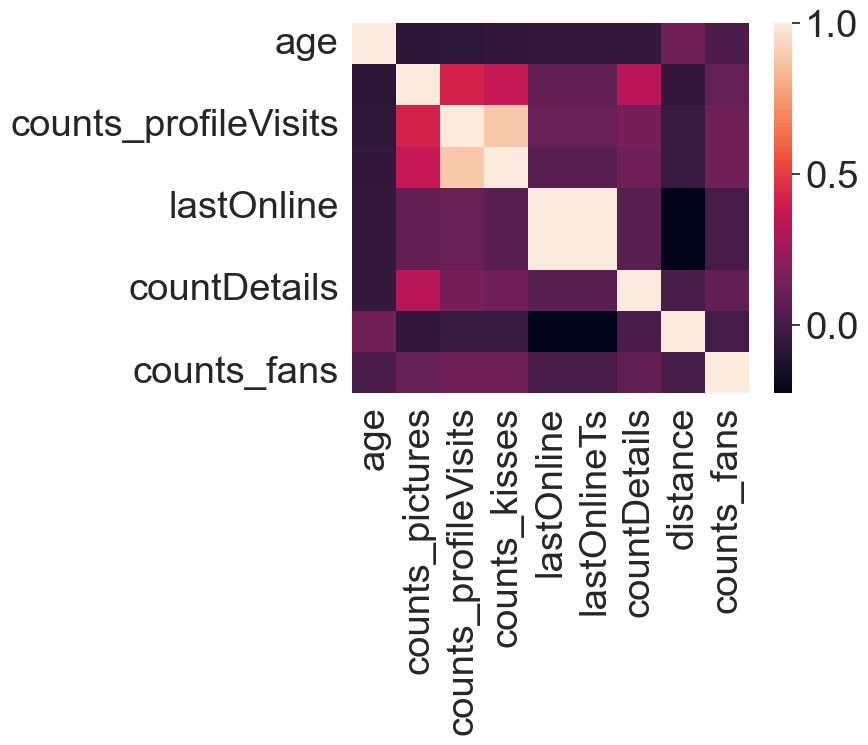

In [48]:
sb.heatmap(num_col_df.corr())

In [44]:
df

age         name  \
userId                                                                 
4e3842f79b70e7ea57000064                             25        daeni   
4e3d34bf5d2bce7b160006a3                             22  italiana 92   
4eef8b81ebf2c8f64000000c                             20   Qqkwmdowlo   
4ef9434cca61bece6a000002                             24     Baby dee   
4f10cbc1883fa97a5f000015                             24         Anna   
...                                                 ...          ...   
55229e2fe66da132848b45a9                             21        Jenny   
55229eb5e56da11a2c8b45a6                             24         Lisa   
CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRyX...   24       Mon**a   
CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4mb...   21          M*l   
CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2...   20        Ma**e   

                                                    counts_pictures  \
userId                                                                
4e3842f79b70e7ea57000064                                          4   
4e3d34bf5d2bce7b160006a3                                          5   
4eef8b81ebf2c8f64000000c                                          3   
4ef9434cca61bece6a000002                                         18   
4f10cbc1883fa97a5f000015                                         13   
...                                                             ...   
55229e2fe66da132848b45a9                                          0   
55229eb5e56da11a2c8b45a6                                          0   
CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRyX...                7   
CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4mb...                5   
CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2...                8   

                                                    counts_profileVisits  \
userId                                                                     
4e3842f79b70e7ea57000064                                            8279   
4e3d34bf5d2bce7b160006a3                                             663   
4eef8b81ebf2c8f64000000c                                           22187   
4ef9434cca61bece6a000002                                            7339   
4f10cbc1883fa97a5f000015                                           18672   
...                                                                  ...   
55229e2fe66da132848b45a9                                               0   
55229eb5e56da11a2c8b45a6                                               0   
CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRyX...                  6049   
CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4mb...                   378   
CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2...                  1014   

                                                    counts_kisses  \
userId                                                              
4e3842f79b70e7ea57000064                                      239   
4e3d34bf5d2bce7b160006a3                                       13   
4eef8b81ebf2c8f64000000c                                     1015   
4ef9434cca61bece6a000002                                      180   
4f10cbc1883fa97a5f000015                                      492   
...                                                           ...   
55229e2fe66da132848b45a9                                        0   
55229eb5e56da11a2c8b45a6                                        0   
CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRyX...            507   
CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4mb...             26   
CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2...             43   

                                                    flirtInterests_chat  \
userId                                                                    
4e3842f79b70e7ea57000064                                              1   
4e3d34bf5d2bce7b160006a3                                              1   
4eef

In [49]:
num_col_df['age'].nunique()

11

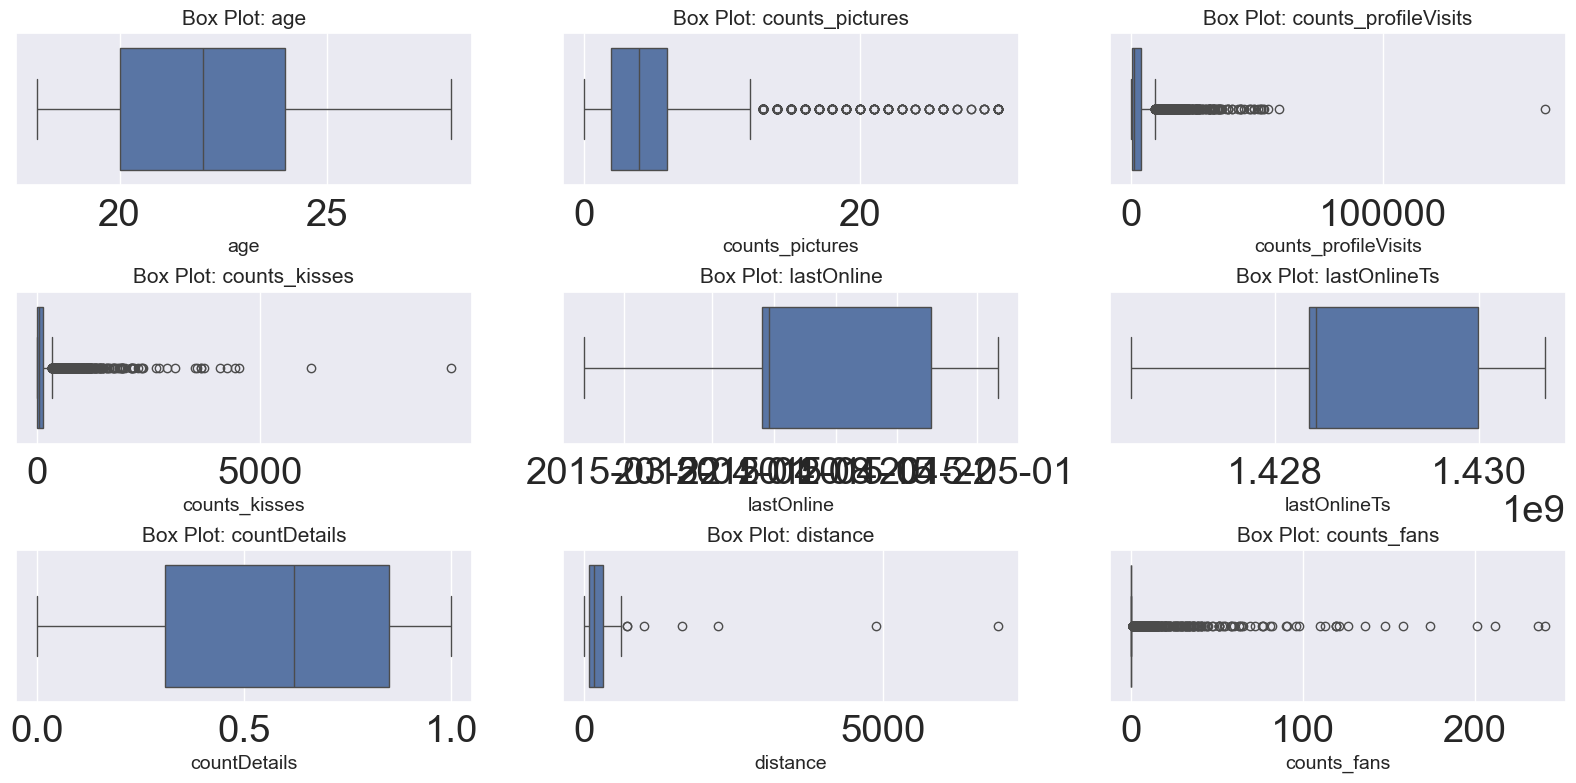

In [50]:
## Using box (Wiskers) plot 
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):
        
            ax = plt.subplot(60, 3, i+1)
            sb.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(num_col_df)

# Outliers

In [51]:
# Function to identify and treat outliers using IQR
def treat_outliers(df, features):
    df_outliers = pd.DataFrame(index=df.index)
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_outliers[feature] = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).astype(int)
    return df_outliers

In [52]:
# Apply the outlier treatment function to numeric columns
outliers_df = treat_outliers(df, num_col_df.columns.tolist())
outliers_df

age  counts_pictures  \
userId                                                                     
4e3842f79b70e7ea57000064                              0                0   
4e3d34bf5d2bce7b160006a3                              0                0   
4eef8b81ebf2c8f64000000c                              0                0   
4ef9434cca61bece6a000002                              0                1   
4f10cbc1883fa97a5f000015                              0                1   
...                                                 ...              ...   
55229e2fe66da132848b45a9                              0                0   
55229eb5e56da11a2c8b45a6                              0                0   
CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRyX...    0                0   
CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4mb...    0                0   
CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2...    0                0   

                                                    counts_profileVisits  \
userId                                                                     
4e3842f79b70e7ea57000064                                               0   
4e3d34bf5d2bce7b160006a3                                               0   
4eef8b81ebf2c8f64000000c                                               1   
4ef9434cca61bece6a000002                                               0   
4f10cbc1883fa97a5f000015                                               1   
...                                                                  ...   
55229e2fe66da132848b45a9                                               0   
55229eb5e56da11a2c8b45a6                                               0   
CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRyX...                     0   
CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4mb...                     0   
CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2...                     0   

                                                    counts_kisses  lastOnline  \
userId                                                                          
4e3842f79b70e7ea57000064                                        0           0   
4e3d34bf5d2bce7b160006a3                                        0           0   
4eef8b81ebf2c8f64000000c                                        1           0   
4ef9434cca61bece6a000002                                        0           0   
4f10cbc1883fa97a5f000015                                        1           0   
...                                                           ...         ...   
55229e2fe66da132848b45a9                                        0           0   
55229eb5e56da11a2c8b45a6                                        0           0   
CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRyX...              1           0   
CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4mb...              0           0   
CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2...              0           0   

                                                    lastOnlineTs  \
userId                                                             
4e3842f79b70e7ea57000064                                       0   
4e3d34bf5d2bce7b160006a3                                       0   
4eef8b81ebf2c8f64000000c                                       0   
4ef9434cca61bece6a000002                                       0   
4f10cbc1883fa97a5f000015                                       0   
...                                                          ...   
55229e2fe66da132848b45a9                                       0   
55229eb5e56da11a2c8b45a6                                       0   
CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRyX...             0   
CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4mb...             0   
CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2...             0   

                                                    countDetails  distance  \
userId                                                   

In [53]:
#Creating a table for outliers change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])
out_df

Empty DataFrame
Columns: [feature, outliers_cnt, distribution_changed, correlation_changed]
Index: []

In [54]:
num_col_df = num_col_df.drop(columns='lastOnline')

In [55]:
num_col_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   4008 non-null   int64  
 1   counts_pictures       4008 non-null   int64  
 2   counts_profileVisits  4008 non-null   int64  
 3   counts_kisses         4008 non-null   int64  
 4   lastOnlineTs          4007 non-null   float64
 5   countDetails          4008 non-null   float64
 6   distance              4008 non-null   float64
 7   counts_fans           3983 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 250.6 KB


In [56]:
# Checking distribution and correlation changes

for col in num_col_df.columns.tolist():
    out = df[col]
    non_out = df[col][outliers_df[col] == 0]
    cor_out = df['counts_kisses']
    cor_non_out = df['counts_kisses'][outliers_df[col] == 0]
    
    # Filter out NaN values for correlation calculation
    valid_out = ~np.isnan(out) & ~np.isnan(cor_out)
    valid_non_out = ~np.isnan(non_out) & ~np.isnan(cor_non_out)
    
    if valid_out.sum() > 1 and valid_non_out.sum() > 1:
        cor_change = '+' if abs(np.corrcoef(out[valid_out], cor_out[valid_out])[0, 1] - 
                                np.corrcoef(non_out[valid_non_out], cor_non_out[valid_non_out])[0, 1]) > 0.05 else '-'
    else:
        cor_change = '-'

    dist_change = '+' if ks_2samp(out.dropna(), non_out.dropna())[1] < 0.05 else '-'

    new_row = pd.DataFrame({'feature': [col],
                            'outliers_cnt': [outliers_df[col].sum()],
                            'distribution_changed': [dist_change],
                            'correlation_changed': [cor_change]})

    out_df = pd.concat([out_df, new_row], ignore_index=True)

C:\Users\matar.aviv\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\matar.aviv\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [57]:
out_df

feature outliers_cnt distribution_changed correlation_changed
0                   age            0                    -                   -
1       counts_pictures          242                    +                   +
2  counts_profileVisits          415                    +                   +
3         counts_kisses          448                    +                   -
4          lastOnlineTs            0                    -                   -
5          countDetails            0                    -                   -
6              distance            7                    -                   -
7           counts_fans          968                    +                   -

In [60]:
df['counts_fans'].sort_values(ascending=False)

userId
54facdb9ca6da10a308b4ba7                                       241.0
551be30bcd6da192358b45ed                                       237.0
550f5c561a0ba056598b4c4b                                       212.0
52adb99c150ba01e4576b1e4                                       201.0
539b146cea6da1f0178b565f                                       174.0
                                                               ...  
CRYTwVREzFby1Ki2S3EoCsl7inIHicExbg2dTMUAK70UsZXxT3tJEhxlQ==      NaN
CRYZDaE0D8DGRtcDVZrAsLUXB5fwMI8mU2VCSVG3tMBMiR4lX7Lh8oraw==      NaN
CRYnzOCr0PuH4s9u8epkDnL5qFZN+S2EvYtoDz9kkTHP5490PU9Dd22ow==      NaN
CRYohLWFV8BkxZIvOom42Cwo3ysdViv+oTosUAOQkLKHTMq+q8FiPNsUg==      NaN
CRYz85gM+yTETN5FonrExXNHyDuwarWygCPnUrwnan7Uet6hf+US6oXyQ==      NaN
Name: counts_fans, Length: 4008, dtype: float64

In [141]:
df['counts_fans'].value_counts().sort_values()

counts_fans
113.0       1
237.0       1
55.0        1
48.0        1
81.0        1
         ... 
4.0        47
3.0        70
2.0       157
1.0       391
0.0      3015
Name: count, Length: 80, dtype: int64

In [161]:
df.loc['519f8018140ba0df4000015b']

age                                                                      23
name                                                                  Alena
counts_pictures                                                          16
counts_profileVisits                                                 164425
counts_kisses                                                          9288
flirtInterests_chat                                                       1
flirtInterests_friends                                                    1
flirtInterests_date                                                       1
isVIP                                                                     0
isVerified                                                                1
lastOnline                                        2015-04-19 11:42:53+00:00
lastOnlineTs                                                   1429443773.0
lang_count                                                                2
lang_fr     

# Missing Values

In [61]:
missing_percentage = df.isna().mean() * 100

# Convert to DataFrame
missing_df = pd.DataFrame({
    'Column': missing_percentage.index,
    'Percentage of Missing': missing_percentage.values
})

In [62]:
missing_df

Column  Percentage of Missing
0                      age               0.000000
1                     name               0.000000
2          counts_pictures               0.000000
3     counts_profileVisits               0.000000
4            counts_kisses               0.000000
5      flirtInterests_chat               0.000000
6   flirtInterests_friends               0.000000
7      flirtInterests_date               0.000000
8                    isVIP               0.000000
9               isVerified               0.000000
10              lastOnline               0.024950
11            lastOnlineTs               0.024950
12              lang_count               0.000000
13                 lang_fr               0.000000
14                 lang_en               0.000000
15                 lang_de               0.000000
16                 lang_it               0.000000
17                 lang_es               0.000000
18                 lang_pt               0.000000
19                    city               0.000000
20            locationCity               0.000000
21            countDetails               0.000000
22               flirtstar               0.000000
23             hasBirthday               0.000000
24                distance               0.000000
25                  mobile               0.000000
26                  online               0.000000
27                 whazzup               0.000000
28               pictureId               0.000000
29     connectedToFacebook               0.000000
30         locationCitySub               0.000000
31      userInfo_visitDate               0.000000
32                  locked              26.646707
33           genderLooking               0.000000
34             counts_fans               0.623752
35                counts_g               0.623752
36                 country               0.000000
37            isInfluencer               0.000000
38     shareProfileEnabled               0.623752
39                freetext               0.000000
40              isfreshman               0.000000
41                   crypt              26.571856
42         isSystemProfile              26.646707

<Axes: >

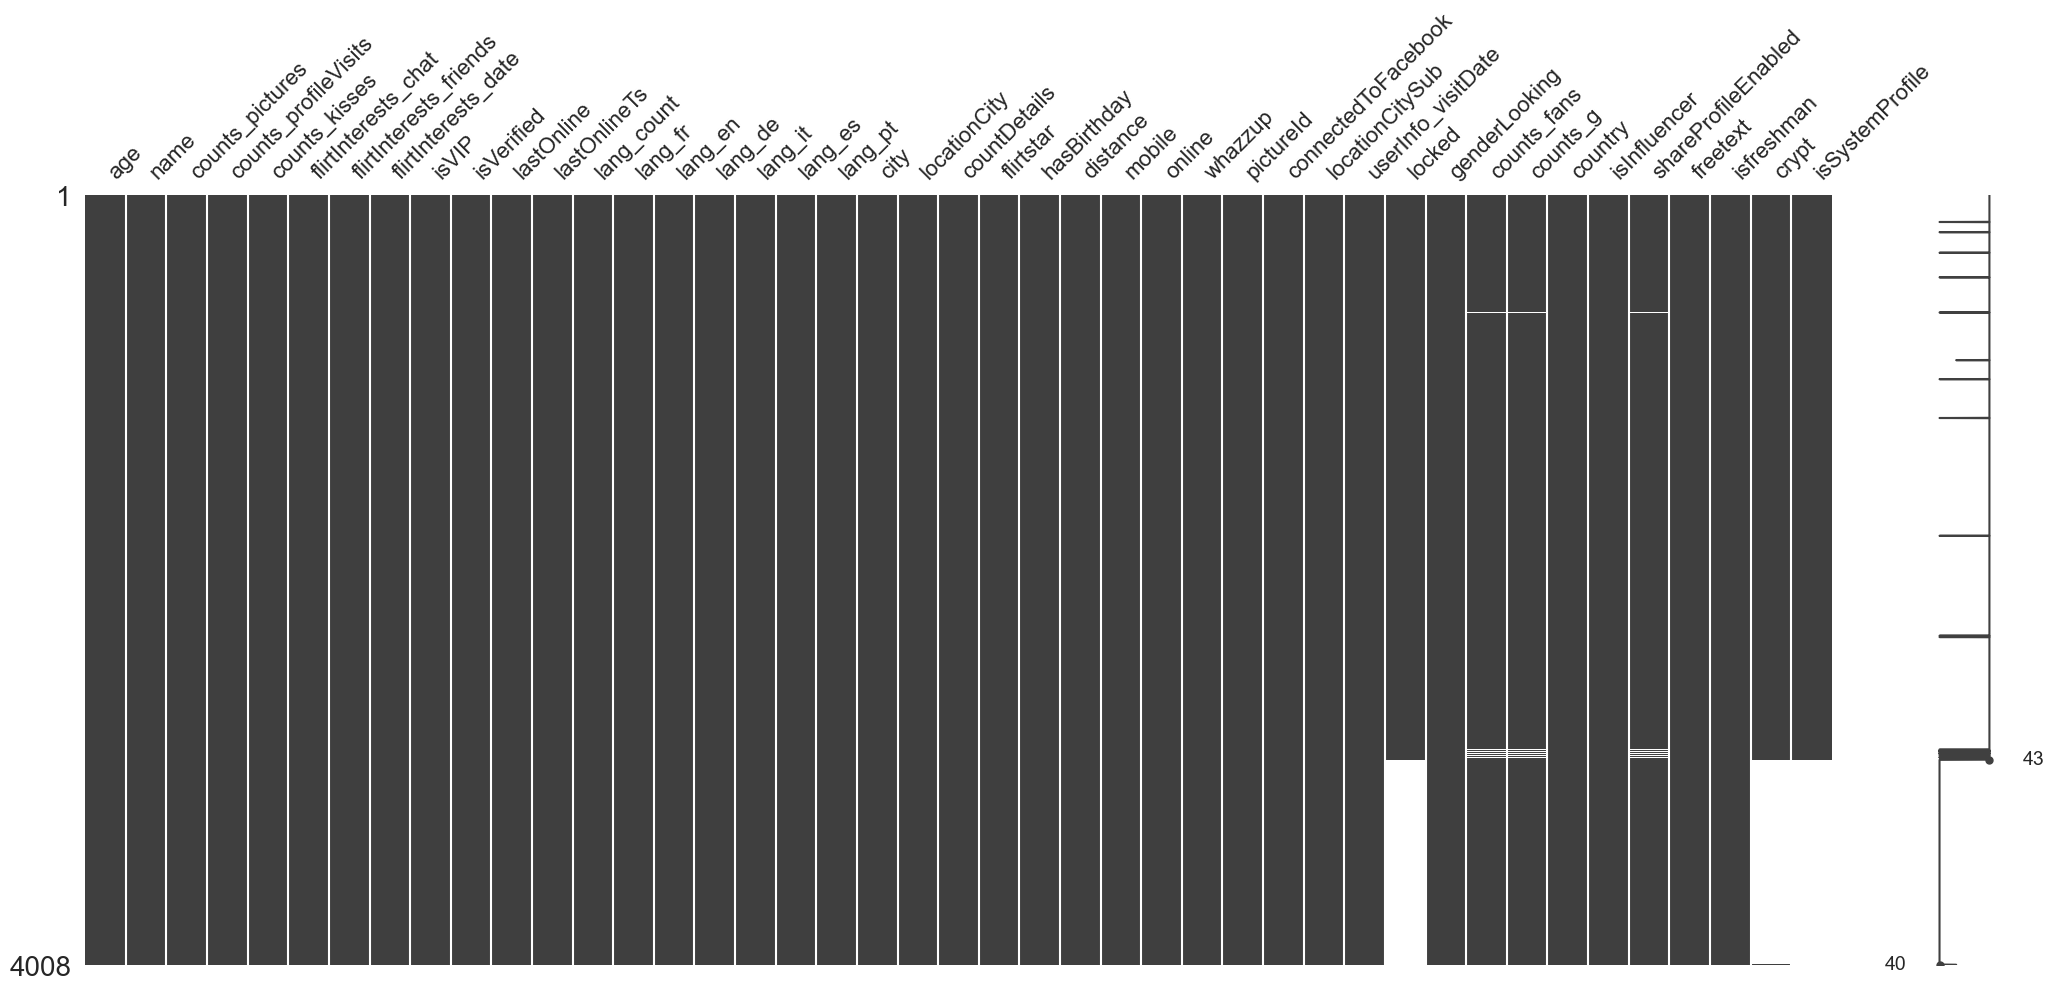

In [63]:
msno.matrix(df)

In [82]:
df = df.reset_index()
df.head()

userId  age         name  counts_pictures  \
0  4e3842f79b70e7ea57000064   25        daeni                4   
1  4e3d34bf5d2bce7b160006a3   22  italiana 92                5   
2  4eef8b81ebf2c8f64000000c   20   Qqkwmdowlo                3   
3  4ef9434cca61bece6a000002   24     Baby dee               18   
4  4f10cbc1883fa97a5f000015   24         Anna               13   

   counts_profileVisits  counts_kisses  flirtInterests_chat  \
0                  8279            239                    1   
1                   663             13                    1   
2                 22187           1015                    1   
3                  7339            180                    1   
4                 18672            492                    0   

   flirtInterests_friends  flirtInterests_date  isVIP  ...  genderLooking  \
0                       1                    1      0  ...              M   
1                       1                    1      0  ...              M   
2                       1                    0      0  ...           none   
3                       0                    1      0  ...              M   
4                       1                    0      0  ...           none   

  counts_fans  counts_g  country  isInfluencer  shareProfileEnabled  \
0         0.0       3.0       CH           0.0                  1.0   
1         0.0       0.0       CH           0.0                  1.0   
2         2.0       3.0       CA           0.0                  1.0   
3         0.0       2.0       DE           0.0                  1.0   
4         0.0       1.0       DE           0.0                  1.0   

                                 freetext  isfreshman  crypt  isSystemProfile  
0  Nur tote Fisch schwimmen mit dem Strom         0.0    0.0              0.0  
1                                     nan         0.0    0.0              0.0  
2                                     nan         0.0    0.0              0.0  
3                                     nan         0.0    0.0              0.0  
4                                     nan         0.0    0.0              0.0  

[5 rows x 44 columns]

# KNN

In [83]:
final_df = df.copy()
imp_cols = final_df.select_dtypes(include = ['float64', 'int64']).columns
knn_imputer = KNNImputer(n_neighbors=1)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(final_df[imp_cols]),columns = imp_cols)

In [84]:
imputed_data

age  counts_pictures  counts_profileVisits  counts_kisses  \
0     25.0              4.0                8279.0          239.0   
1     22.0              5.0                 663.0           13.0   
2     20.0              3.0               22187.0         1015.0   
3     24.0             18.0                7339.0          180.0   
4     24.0             13.0               18672.0          492.0   
...    ...              ...                   ...            ...   
4003  21.0              0.0                   0.0            0.0   
4004  24.0              0.0                   0.0            0.0   
4005  24.0              7.0                6049.0          507.0   
4006  21.0              5.0                 378.0           26.0   
4007  20.0              8.0                1014.0           43.0   

      flirtInterests_chat  flirtInterests_friends  flirtInterests_date  isVIP  \
0                     1.0                     1.0                  1.0    0.0   
1                     1.0                     1.0                  1.0    0.0   
2                     1.0                     1.0                  0.0    0.0   
3                     1.0                     0.0                  1.0    0.0   
4                     0.0                     1.0                  0.0    0.0   
...                   ...                     ...                  ...    ...   
4003                  0.0                     0.0                  0.0    0.0   
4004                  0.0                     0.0                  0.0    0.0   
4005                  0.0                     0.0                  0.0    0.0   
4006                  1.0                     0.0                  0.0    0.0   
4007                  1.0                     1.0                  1.0    0.0   

      isVerified  lastOnlineTs  ...  online  connectedToFacebook  locked  \
0            0.0  1.429995e+09  ...     0.0                  0.0     0.0   
1            0.0  1.430040e+09  ...     0.0                  0.0     0.0   
2            0.0  1.428406e+09  ...     0.0                  0.0     0.0   
3            0.0  1.428504e+09  ...     1.0                  0.0     0.0   
4            0.0  1.430163e+09  ...     1.0                  0.0     0.0   
...          ...           ...  ...     ...                  ...     ...   
4003         0.0  1.428332e+09  ...     1.0                 -1.0     0.0   
4004         0.0  1.428332e+09  ...     1.0                 -1.0     0.0   
4005         1.0  1.428321e+09  ...     0.0                 -1.0     0.0   
4006         0.0  1.428325e+09  ...     1.0                 -1.0     0.0   
4007         0.0  1.428307e+09  ...     0.0                 -1.0     0.0   

      counts_fans  counts_g  isInfluencer  shareProfileEnabled  isfreshman  \
0             0.0       3.0           0.0                  1.0         0.0   
1             0.0       0.0           0.0                  1.0         0.0   
2             2.0       3.0           0.0                  1.0         0.0   
3             0.0       2.0           0.0                  1.0         0.0   
4             0.0       1.0           0.0                  1.0         0.0   
...           ...       ...           ...                  ...         ...   
4003          0.0       0.0           0.0                  1.0         1.0   
4004          0.0       0.0           0.0                  1.0         1.0   
4005          0.0       0.0           0.0                  1.0         0.0   
4006          0.0       0.0           0.0                  0.0         1.0   
4007          3.0       0.0           0.0                  1.0         0.0   

      crypt  isSystemProfile  
0       0.0              0.0  
1       0.0              0.0  
2       0.0              0.0  
3       0.0              0.0  
4       0.0              0.0  
...     ...              ...  
4003    0.0              0.0  
4004    0.0              1.0  
4005    1.0              0.0  
4006    1.0              1.0  
4007    1.0              0

In [85]:
final_df[imp_cols] = imputed_data
final_df

userId   age         name  \
0                              4e3842f79b70e7ea57000064  25.0        daeni   
1                              4e3d34bf5d2bce7b160006a3  22.0  italiana 92   
2                              4eef8b81ebf2c8f64000000c  20.0   Qqkwmdowlo   
3                              4ef9434cca61bece6a000002  24.0     Baby dee   
4                              4f10cbc1883fa97a5f000015  24.0         Anna   
...                                                 ...   ...          ...   
4003                           55229e2fe66da132848b45a9  21.0        Jenny   
4004                           55229eb5e56da11a2c8b45a6  24.0         Lisa   
4005  CRY8ewgkIz8Bc5zolbHipFKd8z3jBxHv5pFTT8hCyKRdRy...  24.0       Mon**a   
4006  CRY92UuuU2F9Rgnb1Y1RsKJuQNhZkpGZzkGlkCZJJ1pr4m...  21.0          M*l   
4007  CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te...  20.0        Ma**e   

      counts_pictures  counts_profileVisits  counts_kisses  \
0                 4.0                8279.0          239.0   
1                 5.0                 663.0           13.0   
2                 3.0               22187.0         1015.0   
3                18.0                7339.0          180.0   
4                13.0               18672.0          492.0   
...               ...                   ...            ...   
4003              0.0                   0.0            0.0   
4004              0.0                   0.0            0.0   
4005              7.0                6049.0          507.0   
4006              5.0                 378.0           26.0   
4007              8.0                1014.0           43.0   

      flirtInterests_chat  flirtInterests_friends  flirtInterests_date  isVIP  \
0                     1.0                     1.0                  1.0    0.0   
1                     1.0                     1.0                  1.0    0.0   
2                     1.0                     1.0                  0.0    0.0   
3                     1.0                     0.0                  1.0    0.0   
4                     0.0                     1.0                  0.0    0.0   
...                   ...                     ...                  ...    ...   
4003                  0.0                     0.0                  0.0    0.0   
4004                  0.0                     0.0                  0.0    0.0   
4005                  0.0                     0.0                  0.0    0.0   
4006                  1.0                     0.0                  0.0    0.0   
4007                  1.0                     1.0                  1.0    0.0   

      ...  genderLooking counts_fans  counts_g  country  isInfluencer  \
0     ...              M         0.0       3.0       CH           0.0   
1     ...              M         0.0       0.0       CH           0.0   
2     ...           none         2.0       3.0       CA           0.0   
3     ...              M         0.0       2.0       DE           0.0   
4     ...           none         0.0       1.0       DE           0.0   
...   ...            ...         ...       ...      ...           ...   
4003  ...              M         0.0       0.0       DE           0.0   
4004  ...              M         0.0       0.0       DE           0.0   
4005  ...              M         0.0       0.0       CH           0.0   
4006  ...              M         0.0       0.0       CH           0.0   
4007  ...              M         3.0       0.0       CH           0.0   

      shareProfileEnabled                                freetext  isfreshman  \
0                     1.0  Nur tote Fisch schwimmen mit dem Strom         0.0   
1                     1.0                                     nan         0.0   
2                     1.0                                     nan         0.0   
3                     1.0                                     nan         0.0   
4                     1.0                                     nan         0.0   
...                   ...      

<Axes: >

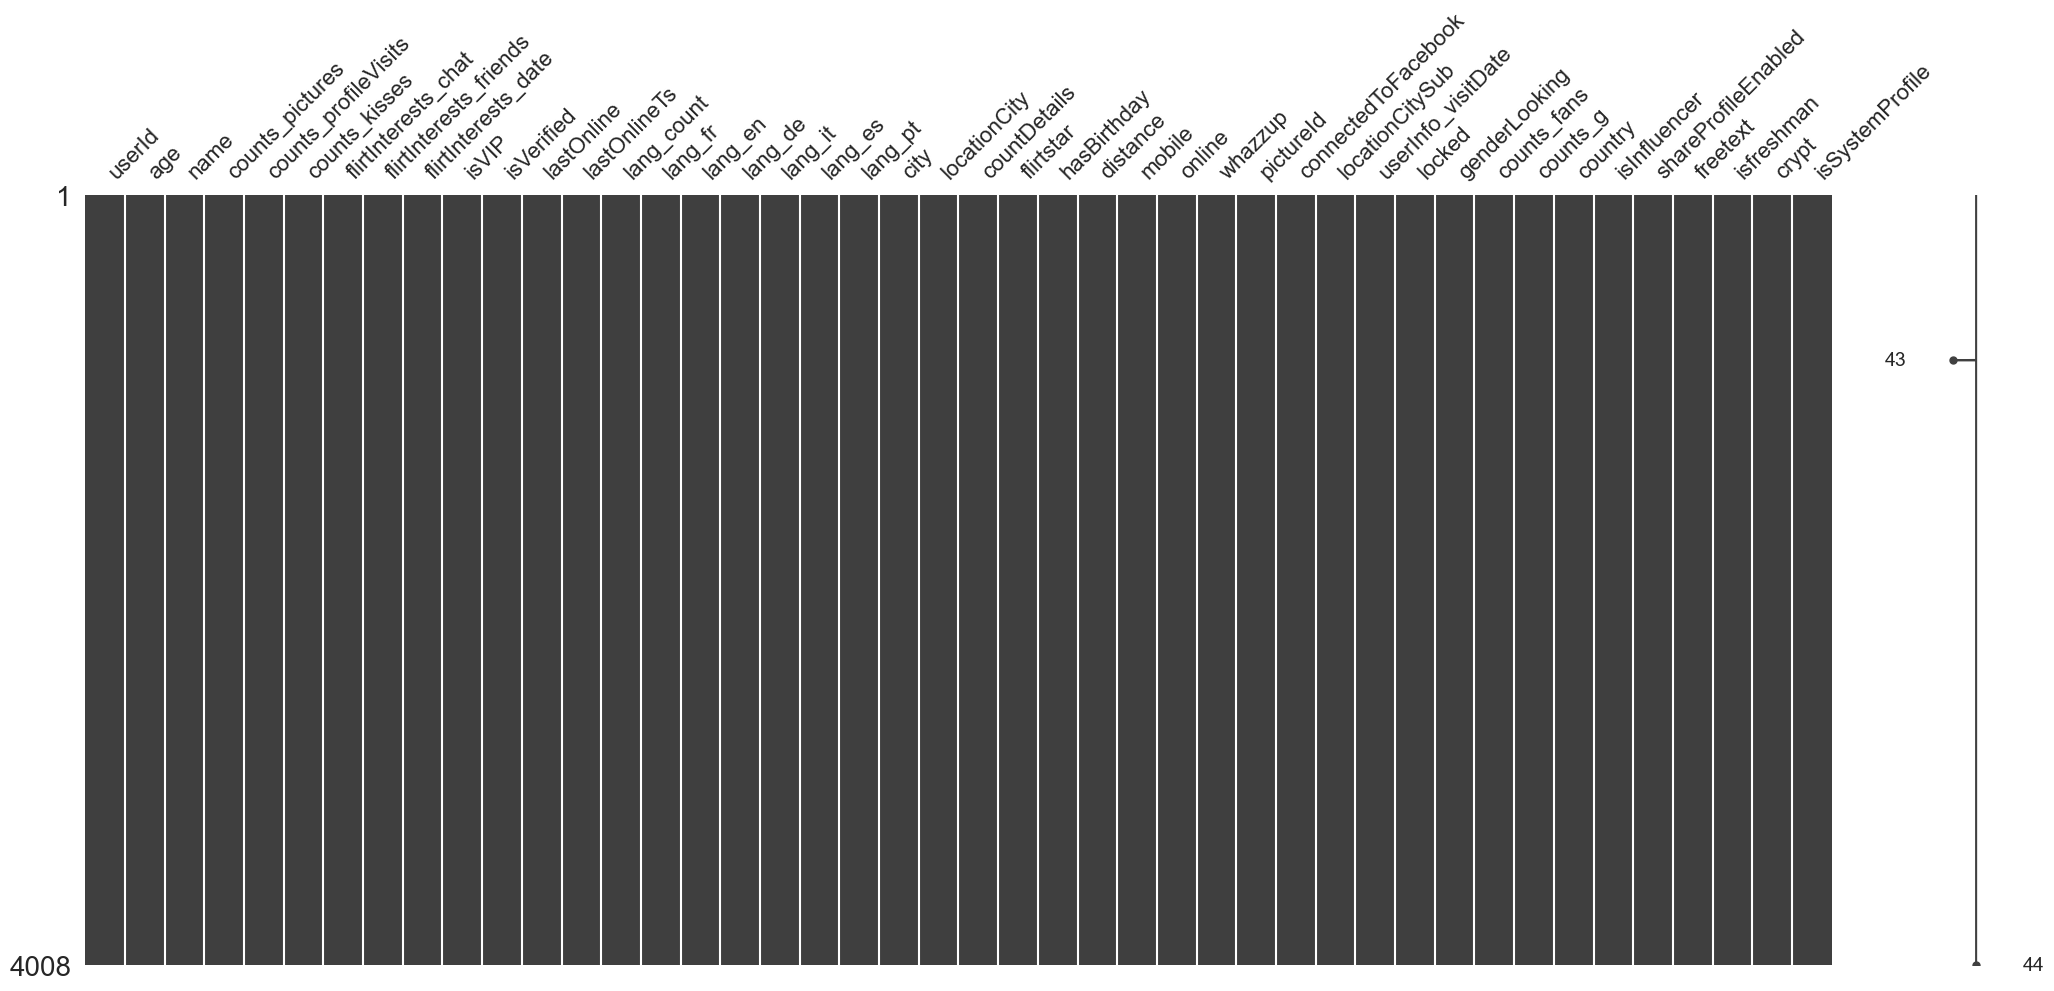

In [86]:
msno.matrix(final_df)

In [87]:
final_df.isnull().sum()

userId                    0
age                       0
name                      0
counts_pictures           0
counts_profileVisits      0
counts_kisses             0
flirtInterests_chat       0
flirtInterests_friends    0
flirtInterests_date       0
isVIP                     0
isVerified                0
lastOnline                1
lastOnlineTs              0
lang_count                0
lang_fr                   0
lang_en                   0
lang_de                   0
lang_it                   0
lang_es                   0
lang_pt                   0
city                      0
locationCity              0
countDetails              0
flirtstar                 0
hasBirthday               0
distance                  0
mobile                    0
online                    0
whazzup                   0
pictureId                 0
connectedToFacebook       0
locationCitySub           0
userInfo_visitDate        0
locked                    0
genderLooking             0
counts_fans         

In [89]:
final_df = final_df.drop(columns='lastOnline')

In [90]:
final_df.to_csv('final_df.csv')